## Capstone Project: NLP1 Group 4: Industrial safety. NLP based Chatbot

### Context:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### Data Description:

This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.

Columns description:
- **Data**: timestamp or time/date information
- **Countries**: which country the accident occurred (anonymised)
- **Local**: the city where the manufacturing plant is located (anonymised)
- **Industry sector**: which sector the plant belongs to
- **Accident level**: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- **Potential Accident Level**: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
- **Genre**: if the person is male of female
- **Employee or Third Party**: if the injured person is an employee or a third party
- **Critical Risk**: some description of the risk involved in the accident
- **Description**: Detailed description of how the accident happened.

**Dataset** : https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

In [ ]:
!pip install unidecode

In [357]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))
pd.set_option('display.max_columns', None)

sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from bs4 import BeautifulSoup

import re
import unidecode

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import Word2Vec, KeyedVectors

from nltk.tokenize import word_tokenize
import nltk


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Milestone 1

### Step 1: Import the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Navigating to drive path where data source is
%cd '/content/drive/MyDrive/Colab/Capstone Project'

/content/drive/Othercomputers/My Laptop/Capstone Project


In [ ]:
data=pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [ ]:
#viewing data
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
#shape of data
data.shape

(425, 11)

In [ ]:
#lets check fields type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [ ]:
#checking is any data is null
data.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

### Step 2: Data cleansing

In [ ]:
data.head(1)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...


In [ ]:
# removing column Unnamed: 0
data.drop("Unnamed: 0", inplace=True, axis=1)

In [ ]:
#checking for duplicated data
data.duplicated().sum()

7

In [ ]:
#lets drop duplicated data
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data.shape

(418, 10)

**Important Data Summary**

- Need to remove first column unnamed
- Change column name to Date instead of Data
- Change column name to Gender instead of Genre
- Change column type to Date instead of Object
- We can rename column Employee or Third Party to Employees Type and Countries to Country
- Rest all columns of Object/categorical type
- No data is null
- removed 7 duplicated data
- We have 418 unique records

In [ ]:
data.head(1)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...


In [ ]:
#renaming column Data, Countries, Genre and Employee or Third Party
data.rename(columns={"Data":"Date",
                     "Countries":"Country",
                     "Genre":"Gender",
                     "Employee or Third Party":"Employee Type"
                     }, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      418 non-null    object
 1   Country                   418 non-null    object
 2   Local                     418 non-null    object
 3   Industry Sector           418 non-null    object
 4   Accident Level            418 non-null    object
 5   Potential Accident Level  418 non-null    object
 6   Gender                    418 non-null    object
 7   Employee Type             418 non-null    object
 8   Critical Risk             418 non-null    object
 9   Description               418 non-null    object
dtypes: object(10)
memory usage: 32.8+ KB


In [ ]:
data.columns

Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk',
       'Description'],
      dtype='object')

In [ ]:
#lets check unique values for all columns

print('Unique values in each columns:')

for i in (['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk']):
  print('-'*100)
  print('Total Unique values in '+i+ " :"+ str(data[i].nunique()))
  print()
  print(data[i].unique())

Unique values in each columns:
----------------------------------------------------------------------------------------------------
Total Unique values in Date :287

['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-0

In [ ]:
#lets check values distibution
print('Values distribution in each columns:')

for i in (['Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk']):
  print('-'*100)
  print('Value distribution for '+i+ " :")
  print()
  print(data[i].value_counts())
  print()
  print(data[i].value_counts(normalize=True))

Values distribution in each columns:
----------------------------------------------------------------------------------------------------
Value distribution for Country :

Country_01    248
Country_02    129
Country_03     41
Name: Country, dtype: int64

Country_01   0.59
Country_02   0.31
Country_03   0.10
Name: Country, dtype: float64
----------------------------------------------------------------------------------------------------
Value distribution for Local :

Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

Local_03   0.21
Local_05   0.14
Local_01   0.13
Local_04   0.13
Local_06   0.11
Local_10   0.10
Local_08   0.06
Local_02   0.06
Local_07   0.03
Local_12   0.01
Local_09   0.00
Local_11   0.00
Name: Local, dtype: float64
----------------------------------------------------------------------------------------------------


In [ ]:
# lets convert Date column to date type and extract year, month, day, weekday, week_no

data['Date']= pd.to_datetime(data['Date'])

data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Day'] = data['Date'].apply(lambda x : x.day)
data['Weekday'] = data['Date'].apply(lambda x : x.day_name())
data['WeekofYear'] = data['Date'].apply(lambda x : x.weekofyear)

In [ ]:
data.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53


Lets create new feature Season to see if there is any connection of accidents and season

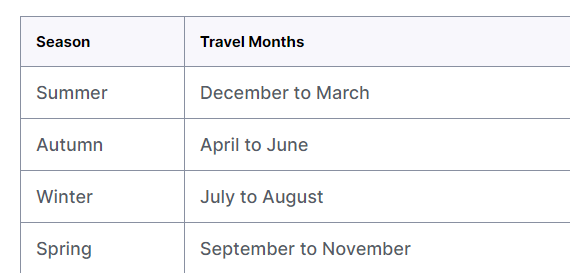

In [ ]:
month2seasons_lambda = lambda x: 'Spring' if x in [9, 10, 11] else ('Summer' if x in [12, 1, 2,3] else ('Autumn' if x in [4, 5, 6] else 'Winter'))

data['season']=data['Month'].apply(month2seasons_lambda)

In [ ]:
data.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer


Lets create one more feature of Holiday

In [ ]:
from holidays import country_holidays

In [ ]:
brazil_holidays = country_holidays('BR', years=[2016,2017])

holiday_list=[]

for date, holiday_name in brazil_holidays.items():
    print(f"{date}: {holiday_name}")
    holiday_list.append(date)

2016-01-01: Confraternização Universal
2016-03-25: Sexta-feira Santa
2016-04-21: Tiradentes
2016-05-01: Dia do Trabalhador
2016-09-07: Independência do Brasil
2016-10-12: Nossa Senhora Aparecida
2016-11-02: Finados
2016-11-15: Proclamação da República
2016-12-25: Natal
2017-01-01: Confraternização Universal
2017-04-14: Sexta-feira Santa
2017-04-21: Tiradentes
2017-05-01: Dia do Trabalhador
2017-09-07: Independência do Brasil
2017-10-12: Nossa Senhora Aparecida
2017-11-02: Finados
2017-11-15: Proclamação da República
2017-12-25: Natal


In [ ]:
data['is_holiday']=data['Date'].apply( lambda x: 1 if x in holiday_list else 0)

In [ ]:
data.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,season,is_holiday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0


In [ ]:
data['is_holiday'].value_counts()

0    414
1      4
Name: is_holiday, dtype: int64

In [ ]:
data[data['is_holiday']==1]['Date']

0     2016-01-01
68    2016-03-25
95    2016-04-21
105   2016-05-01
Name: Date, dtype: datetime64[ns]

It seems there are only 4 recors where accidents occured on holiday. So we can discard this new feature or add more dates of holidays

In [ ]:
data.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,season,is_holiday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1


Lets Visualize the accident level for different features

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Calculate counts for each country
counts = data['Country'].value_counts().reset_index()
counts.columns = ['Country', 'Count']

# Create bar plot
fig = px.bar(counts, x='Country', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Country', xaxis_title='Country', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:

# Calculate counts for each combination of Country and Accident Level
counts = data.groupby(['Country', 'Accident Level']).size().reset_index(name='Count')

# Create bar plot
fig = px.bar(counts, x='Country', y='Count', color='Accident Level',
             text='Count')

# Update layout
fig.update_layout(title='Accident per Country', xaxis_title='Country', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
# Calculate counts for each country
counts = data['Local'].value_counts().reset_index()
counts.columns = ['Local', 'Count']

# Create bar plot
fig = px.bar(counts, x='Local', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Local', xaxis_title='Local', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:

counts = data['Industry Sector'].value_counts().reset_index()
counts.columns = ['Industry Sector', 'Count']

# Create bar plot
fig = px.bar(counts, x='Industry Sector', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Industry Sector', xaxis_title='Industry Sector', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
counts = data.groupby(['Industry Sector', 'Accident Level']).size().reset_index(name='Count')

# Create bar plot
fig = px.bar(counts, x='Industry Sector', y='Count', color='Accident Level',
             text='Count')

# Update layout
fig.update_layout(title='Accident per Industry Sector', xaxis_title='Industry Sector', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
counts = data['Accident Level'].value_counts().reset_index()
counts.columns = ['Accident Level', 'Count']

# Create bar plot
fig = px.bar(counts, x='Accident Level', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Accident Level', xaxis_title='Accident Level', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
counts = data['Gender'].value_counts().reset_index()
counts.columns = ['Gender', 'Count']

# Create bar plot
fig = px.bar(counts, x='Gender', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Gender', xaxis_title='Gender', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
counts = data['Employee Type'].value_counts().reset_index()
counts.columns = ['Employee Type', 'Count']

# Create bar plot
fig = px.bar(counts, x='Employee Type', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Employee Type', xaxis_title='Employee Type', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
counts = data.groupby(['Employee Type', 'Accident Level']).size().reset_index(name='Count')

# Create bar plot
fig = px.bar(counts, x='Employee Type', y='Count', color='Accident Level',
             text='Count')

# Update layout
fig.update_layout(title='Accident per Employee Type', xaxis_title='Employee Type', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
counts = data['Critical Risk'].value_counts().reset_index()
counts.columns = ['Critical Risk', 'Count']

# Create bar plot
fig = px.bar(counts, x='Critical Risk', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Critical Risk', xaxis_title='Critical Risk', yaxis_title='Count')

# Show plot
fig.show()

In [ ]:
# Concatenate 'Year' and 'Month' columns into a single column
data['YearMonth'] = data['Year'].astype(str) + '-' + data['Month'].astype(str)

# Calculate counts for each combination of YearMonth
counts = data['YearMonth'].value_counts().reset_index()
counts.columns = ['YearMonth', 'Count']

# Create bar plot
fig = px.bar(counts, x='YearMonth', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Year-Month', xaxis_title='Year-Month', yaxis_title='Count',
                  xaxis=dict(tickmode='linear', dtick=1))  # Display all Year-Month combinations

# Show plot
fig.show()

- Data is inadequate to comment on any trend.
- For both year, it seems February has high number of accidents
- For 2016, we can say that no of accident in first 6 month seems to be more than last 6 months

In [ ]:
counts = data['Year'].value_counts().reset_index()
counts.columns = ['Year', 'Count']

# Create bar plot
fig = px.bar(counts, x='Year', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Year', xaxis_title='Year', yaxis_title='Count', xaxis=dict(tickmode='linear', dtick=1))

# Show plot
fig.show()

In [ ]:
counts = data['Day'].value_counts().reset_index()
counts.columns = ['Day', 'Count']

# Create bar plot
fig = px.bar(counts, x='Day', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Day', xaxis_title='Day', yaxis_title='Count', xaxis=dict(tickmode='linear', dtick=1))

# Show plot
fig.show()

 - It seems that on 4, 8, 11 , 16,22,23 and 24 of month no of accident seems to be high

In [ ]:
counts = data['Weekday'].value_counts().reset_index()
counts.columns = ['Weekday', 'Count']

# Define the desired order of weekdays
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create bar plot
fig = px.bar(counts, x='Weekday', y='Count', text='Count')

# Update layout and specify category order for weekdays
fig.update_layout(title='Accident per Weekday', xaxis_title='Weekday', yaxis_title='Count',
                  xaxis=dict(categoryorder='array', categoryarray=weekday_order))

# Show plot
fig.show()

 - It seems that no of accident seems to be more on Tuesday and Thursday and relatively low on Sunday and Monday

In [ ]:
counts = data['season'].value_counts().reset_index()
counts.columns = ['season', 'Count']

# Create bar plot
fig = px.bar(counts, x='season', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per season', xaxis_title='season', yaxis_title='Count')

# Show plot
fig.show()

- seems more no of accidents in summer and autumn, i.e, first half of yea

Note: data for 2017 is for only first 6 month

In [ ]:
# Concatenate 'Year' and 'Season' columns into a single column
data['YearSeason'] = data['Year'].astype(str) + '-' + data['season']

# Calculate counts for each combination of YearSeason
counts = data['YearSeason'].value_counts().reset_index()
counts.columns = ['YearSeason', 'Count']

# Sort by Year
counts['Year'] = counts['YearSeason'].str.split('-').str[0].astype(int)
counts = counts.sort_values(by='Year')

# Create bar plot
fig = px.bar(counts, x='YearSeason', y='Count', text='Count')

# Update layout
fig.update_layout(title='Accident per Year-Season', xaxis_title='Year-Season', yaxis_title='Count')

# Show plot
fig.show()

- Spearating based on year and season, we can conclude that it seems that first 6 month of year seems to be having more accident compared to last 6 month
- we can see that accident seem to be decreasing from summer to winter and then increasing from winter to summer

In [ ]:
data.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,season,is_holiday,YearMonth,YearSeason
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1,2016-1,2016-Summer


In [ ]:
#removing YearMonth and YearSeason

data.drop(columns=['YearMonth','YearSeason'], inplace=True, axis=1)

### Step 3: Data preprocessing (NLP Preprocessing techniques)

In [ ]:
data.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,season,is_holiday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1


Lets check few samples

In [ ]:
import random
import textwrap

In [ ]:
for i in range(0,5):
  j=random.randint(0,data.shape[0])
  print('-'*50)
  print("Accident Level: ",data['Accident Level'][j])
  print('Description:')
  print(textwrap.fill(data['Description'][j], width=120))


--------------------------------------------------
Accident Level:  I
Description:
At level 4150 Geology - Surface, master mine to temporarily repair water leakage from a 4-inch diameter metal
distributor, makes a cut of a rim chamber strip of 4cm wide x 100cm long making Using a cutter, his partner stretches
the camera when cutting with force the edge of the cutter makes contact with the index finger of the left hand causing a
superficial cut. At the time of the event the worker was wearing boss gloves.
--------------------------------------------------
Accident Level:  I
Description:
Employee was performing drilling activity with the LM17 probe at level 585 GPS and when positioning the needle stem came
to hit the left hand ring finger against the retraction box causing superficial injury.
--------------------------------------------------
Accident Level:  I
Description:
During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the ho

- It seems there are accented character
- there are lots of punctuations and no in the description

In [ ]:
word_length=data['Description'].apply(lambda x: len(x.split()))

print('Maximum words in description :', max(word_length))
print('Minimum words in description :', min(word_length))
print('Average words in description :', np.mean(word_length))

Maximum words in description : 183
Minimum words in description : 16
Average words in description : 65.06459330143541


In [ ]:
sentence_length=data['Description'].str.len()
print('Maximum sentence length in description :', max(sentence_length))
print('Minimum sentence length in description :', min(sentence_length))
print('Average sentence length in description :', np.mean(sentence_length))

Maximum sentence length in description : 1029
Minimum sentence length in description : 94
Average sentence length in description : 365.4138755980861


In [ ]:
data['Description'].str.len()

0      457
1      307
2      314
3      562
4      487
      ... 
413    220
414    219
415    251
416    187
417    208
Name: Description, Length: 418, dtype: int64

 Performing following preprocessing steps
  - removing accented characters
  - converting to lower case (can be covered during tokenization part)
  - removing punctuations
  - removing HTML characters
  - removing numbers as well

Please note- Deliberately **not removing stop words and lemmatizing** as we are preserving the sequence for LSTM. Not doing spell check.

In [ ]:
#taking backup of dataframe
data1=data.copy()

In [ ]:
clean_description=[]

for i in range(0, data.shape[0]):

  #removing HTMl characters
  soup = BeautifulSoup(data['Description'][i], "html.parser")
  desc = soup.get_text()

  #removing anything besides a-zA-Z and single space
  desc=  re.sub('[^a-zA-Z\s]', '', desc)

  #lowering the text
  desc=desc.lower()

  #removing accented characters
  desc= ' '.join(unidecode.unidecode(word) for word in desc.split())

  #removing extra new lines
  desc = re.sub('[\r|\n|\r\n]+', ' ',desc)

  # remove extra whitespace
  desc = re.sub(' +', ' ', desc)

  clean_description.append(desc)

In [ ]:
len(clean_description)

418

In [ ]:
data['clean_description']=clean_description

In [ ]:
data.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,season,is_holiday,clean_description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1,while removing the drill rod of the jumbo for ...


In [ ]:
#lets check 5 random samples again

for i in range(0,5):
  j=random.randint(0,data.shape[0])
  print('-'*50)
  print("Accident Level: ",data['Accident Level'][j])
  print('Description:')
  print(textwrap.fill(data['clean_description'][j], width=120))


--------------------------------------------------
Accident Level:  I
Description:
when starting the activity of removing a coil of electric cables in the warehouse with the help of forklift truck the
operator did not notice that there was a beehive in it due to the movement of the coil the bees were excited realizing
the fact the operator turned off the equipment and left the area people passing by were stung
--------------------------------------------------
Accident Level:  I
Description:
employee reports that when trying to remove one of the plates from the overflow system of the ustulador oven the th
finger of the right hand was pressed between the tool wrench with extension and the overflow flange of the ustulador
oven located behind the performer
--------------------------------------------------
Accident Level:  II
Description:
at times when the worker was cleaning the long holes of the production mesh in negative when removing the polyethylene
pipe it suffers a clogging inside

In [ ]:
#Lets check word and sentences length again after cleaning

word_length=data['clean_description'].apply(lambda x: len(x.split()))

print('Maximum words in description :', max(word_length))
print('Minimum words in description :', min(word_length))
print('Average words in description :', np.mean(word_length))


sentence_length=data['clean_description'].str.len()
print('Maximum sentence length in description :', max(sentence_length))
print('Minimum sentence length in description :', min(sentence_length))
print('Average sentence length in description :', np.mean(sentence_length))

Maximum words in description : 180
Minimum words in description : 16
Average words in description : 63.23205741626794
Maximum sentence length in description : 998
Minimum sentence length in description : 92
Average sentence length in description : 350.39234449760767


There isn't much diffrence in word and sentence length after cleaning

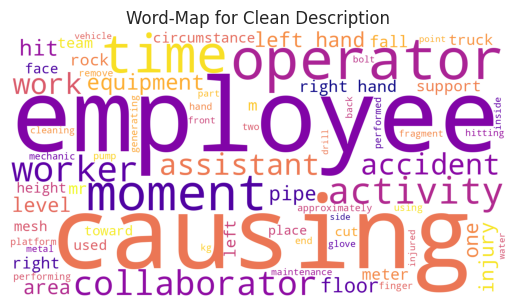

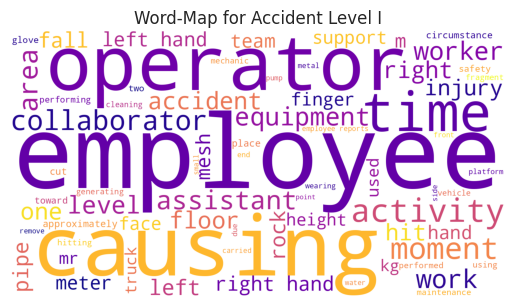

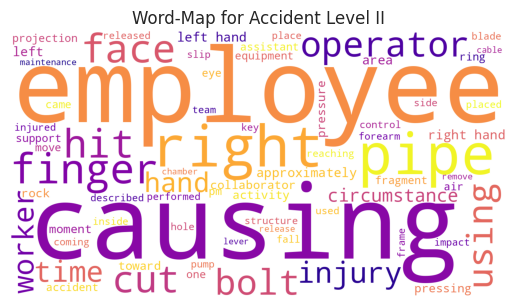

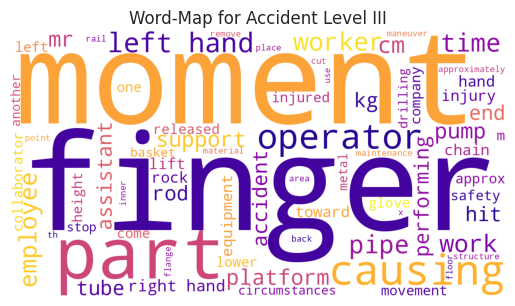

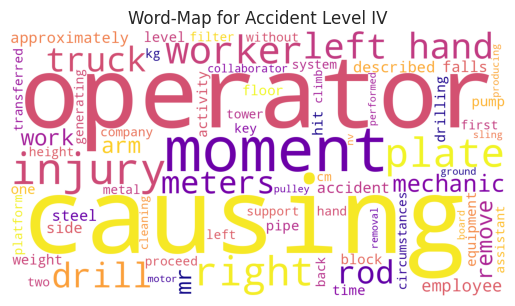

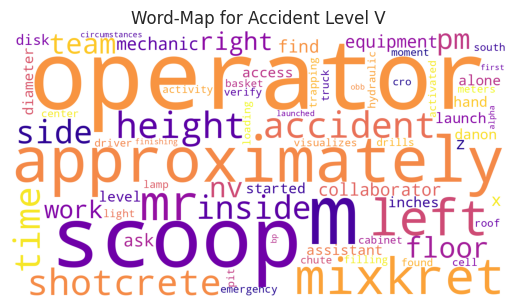

In [ ]:
#lets check word cloud for different accident levels
plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data['clean_description']))
    )
plt.title('Word-Map for Clean Description')
plt.axis('off')
plt.show()


plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data[data['Accident Level'] == 'I']['clean_description']))
    )
plt.title('Word-Map for Accident Level I')
plt.axis('off')
plt.show()

plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data[data['Accident Level'] == 'II']['clean_description']))
    )
plt.title('Word-Map for Accident Level II')
plt.axis('off')
plt.show()

plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data[data['Accident Level'] == 'III']['clean_description']))
    )
plt.title('Word-Map for Accident Level III')
plt.axis('off')
plt.show()

plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data[data['Accident Level'] == 'IV']['clean_description']))
    )
plt.title('Word-Map for Accident Level IV')
plt.axis('off')
plt.show()

plt.imshow(
    WordCloud(max_words = 70,
              stopwords=STOPWORDS,
              width=1500,
              height=800,
              background_color = 'white',
              colormap='plasma',
               min_font_size=10,
              ).generate(" ".join(data[data['Accident Level'] == 'V']['clean_description']))
    )
plt.title('Word-Map for Accident Level V')
plt.axis('off')
plt.show()

In [ ]:
#removing date field as we have extracted month, year and day

data.drop(columns='Date', axis=1, inplace=True)

In [ ]:
#removing description field as we have clean_description

data.drop(columns='Description', axis=1, inplace=True)

In [ ]:
data.head(1)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Year,Month,Day,Weekday,WeekofYear,season,is_holiday,clean_description
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016,1,1,Friday,53,Summer,1,while removing the drill rod of the jumbo for ...


### Step 4: Data preparation - Cleansed data in .xlsx or .csv file

In [ ]:
data.shape

(418, 16)

In [ ]:
#lets save the clean data

data.to_csv('cleaned_IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv',
            index=False)

### Step 5: Design train and test basic machine learning classifiers

In [ ]:
#lets read the clean data from CSV
cleaned_data=pd.read_csv('cleaned_IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [ ]:
#lets validate shape
cleaned_data.shape

(418, 16)

In [ ]:
cleaned_data.head(1)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Year,Month,Day,Weekday,WeekofYear,season,is_holiday,clean_description
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016,1,1,Friday,53,Summer,1,while removing the drill rod of the jumbo for ...


 We need to convert categorical data to numerical data for using in model

In [ ]:
#converting Accident Level and Potential Accident Level to Labels
basic_model_data=pd.DataFrame()

label_encoder=LabelEncoder()

basic_model_data['Accident Level']=label_encoder.fit_transform(cleaned_data['Accident Level'])
basic_model_data['Potential Accident Level']=label_encoder.fit_transform(cleaned_data['Potential Accident Level'])


In [ ]:
cleaned_data.columns

Index(['Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk',
       'Year', 'Month', 'Day', 'Weekday', 'WeekofYear', 'season', 'is_holiday',
       'clean_description'],
      dtype='object')

In [ ]:
#creating dummy variables for rest of category
dummy_cols= pd.get_dummies(cleaned_data[['Country','Local','Industry Sector', 'Gender', 'Employee Type', 'Critical Risk'
,'Weekday','season']], drop_first=True)

dummy_cols.shape

(418, 59)

In [ ]:
dummy_cols.head(1)

,Country_Country_02,Country_Country_03,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Mining,Industry Sector_Others,Gender_Male,Employee Type_Third Party,Employee Type_Third Party (Remote),Critical Risk_Bees,Critical Risk_Blocking and isolation of energies,Critical Risk_Burn,Critical Risk_Chemical substances,Critical Risk_Confined space,Critical Risk_Cut,Critical Risk_Electrical Shock,Critical Risk_Electrical installation,Critical Risk_Fall,Critical Risk_Fall prevention,Critical Risk_Fall prevention (same level),Critical Risk_Individual protection equipment,Critical Risk_Liquid Metal,Critical Risk_Machine Protection,Critical Risk_Manual Tools,Critical Risk_Others,Critical Risk_Plates,Critical Risk_Poll,Critical Risk_Power lock,Critical Risk_Pressed,Critical Risk_Pressurized Systems,Critical Risk_Pressurized Systems / Chemical Substances,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,season_Spring,season_Summer,season_Winter
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
basic_model_data=pd.concat([basic_model_data, cleaned_data[['Year', 'Month', 'Day','WeekofYear', 'is_holiday']], dummy_cols ], axis=1)

In [ ]:
basic_model_data.shape

(418, 66)

Download Glove model

In [ ]:
#!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

In [ ]:
#!unzip glove.6B.zip

In [ ]:
embeddings_index = {}
EMBEDDING_FILE = 'glove.6B.200d.txt'
f = open(EMBEDDING_FILE)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# Function to create a normalized vector for whole sentence
def sent2vec(s):
    words = word_tokenize(s)
    N = []
    for w in words:
        try:
            N.append(embeddings_index[w])
        except:
            continue
    N = np.array(N)
    v = N.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(200)
    return v

In [ ]:
# Create sentence vectors using the above function for training and validation set
description_glove = [sent2vec(x) for x in cleaned_data['clean_description']]

In [ ]:
len(description_glove)

418

In [ ]:
basic_model_data=pd.concat([basic_model_data, pd.DataFrame(description_glove)], axis=1)

In [ ]:
basic_model_data.columns = basic_model_data.columns.astype(str)

In [ ]:
basic_model_data.head(1)

,Accident Level,Potential Accident Level,Year,Month,Day,WeekofYear,is_holiday,Country_Country_02,Country_Country_03,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Mining,Industry Sector_Others,Gender_Male,Employee Type_Third Party,Employee Type_Third Party (Remote),Critical Risk_Bees,Critical Risk_Blocking and isolation of energies,Critical Risk_Burn,Critical Risk_Chemical substances,Critical Risk_Confined space,Critical Risk_Cut,Critical Risk_Electrical Shock,Critical Risk_Electrical installation,Critical Risk_Fall,Critical Risk_Fall prevention,Critical Risk_Fall prevention (same level),Critical Risk_Individual protection equipment,Critical Risk_Liquid Metal,Critical Risk_Machine Protection,Critical Risk_Manual Tools,Critical Risk_Others,Critical Risk_Plates,Critical Risk_Poll,Critical Risk_Power lock,Critical Risk_Pressed,Critical Risk_Pressurized Systems,Critical Risk_Pressurized Systems / Chemical Substances,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,season_Spring,season_Summer,season_Winter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0,3,2016,1,1,53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.67,19.93,-0.02,-11.31,4.04,18.14,-20.14,-6.10,-8.21,4.63,3.11,15.66,10.79,6.70,26.09,-4.53,1.19,9.09,-2.72,-3.46,12.15,190.84,9.77,-0.78,7.47,6.58,-11.65,6.54,-0.95,0.20,7.98,-12.03,-0.97,0.98,-2.10,-9.37,-41.08,-20.13,-11.45,-5.36,7.23,-10.80,4.97,21.31,-2.24,20.89,18.45,8.54,8.90,25.43,-3.23,1.49,1.05,12.76,7.87,-1.14,-4.37,1.10,-7.29,1.75,8.16,-5.17,-25.68,-5.67,11.25,3.77,-7.76,5.77,1.05,-3.76,25.22,1.71,12.38,11.06,-8.73,29.33,-4.13,-1.59,-0.69,-6.89,2.70,-10.90,-14.63,6.54,6.32,-1.95,-12.52,-19.81,43.11,-42.60,6.03,4.27,21.24,3.14,-11.58,2.93,13.89,-4.29,-1.77,-8.97,-3.26,0.65,-0.18,6.51,-6.15,-10.93,4.11,71.02,-10.99,-4.04,-5.59,-11.30,2.55,12.96,6.92,-1.62,1.80,-7.94,-12.47,-4.87,14.83,4.63,3.98,14.47,3.33,-29.71,19.52,9.04,-1.27,0.75,-13.11,19.56,14.75,-23.56,-3.28,15.42,2.83,-12.38,-8.16,-8.13,-1.44,8.98,9.91,-4.95,80.26,7.33,-9.03,-14.68,1.33,7.16,5.42,14.30,1.88,-12.86,14.71,5.82,-14.77,20.58,-6.51,-35.25,9.24,-6.12,-12.51,1.72,-2.21,7.77,-14.43,-3.10,-20.84,37.39,6.31,7.50,14.83,-10.61,2.97,0.99,-8.24,-26.16,-0.57,0.48,66.47,-17.27,-3.35,2.47,-5.73,-11.07,-8.87,4.73,6.53,23.39,-4.08,10.43,-12.26,15.43,-1.27,1.52,-0.27,5.65,-9.59,16.00


In [ ]:
basic_model_data.shape

(418, 266)

In [ ]:
X=basic_model_data.drop(columns=['Accident Level','Potential Accident Level'])
y=basic_model_data[['Accident Level']]

In [ ]:
X.shape, y.shape

((418, 264), (418, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [ ]:
X_train.shape, y_train.shape

((334, 264), (334, 1))

In [ ]:
X_test.shape, y_test.shape

((84, 264), (84, 1))

In [247]:
y_train.value_counts()

Accident Level
0                 247
1                  32
2                  25
3                  24
4                   6
dtype: int64

In [ ]:
y_train.value_counts(normalize=True)

Accident Level
0                0.74
1                0.10
2                0.07
3                0.07
4                0.02
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

Accident Level
0                0.74
1                0.10
2                0.07
3                0.07
4                0.02
dtype: float64

Normalizing the data

In [ ]:
ss = StandardScaler()

X_train_std= ss.fit_transform(X_train)

X_test_std = ss.transform(X_test)

In [ ]:
X_train_std=pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_std=pd.DataFrame(X_test_std, columns= X_test.columns)

In [ ]:
X_train_std

,Year,Month,Day,WeekofYear,is_holiday,Country_Country_02,Country_Country_03,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Mining,Industry Sector_Others,Gender_Male,Employee Type_Third Party,Employee Type_Third Party (Remote),Critical Risk_Bees,Critical Risk_Blocking and isolation of energies,Critical Risk_Burn,Critical Risk_Chemical substances,Critical Risk_Confined space,Critical Risk_Cut,Critical Risk_Electrical Shock,Critical Risk_Electrical installation,Critical Risk_Fall,Critical Risk_Fall prevention,Critical Risk_Fall prevention (same level),Critical Risk_Individual protection equipment,Critical Risk_Liquid Metal,Critical Risk_Machine Protection,Critical Risk_Manual Tools,Critical Risk_Others,Critical Risk_Plates,Critical Risk_Poll,Critical Risk_Power lock,Critical Risk_Pressed,Critical Risk_Pressurized Systems,Critical Risk_Pressurized Systems / Chemical Substances,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,season_Spring,season_Summer,season_Winter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.68,0.23,-0.61,0.14,-0.10,1.52,-0.33,-0.24,-0.53,-0.37,2.50,-0.36,-0.18,-0.26,-0.08,-0.33,-0.05,-0.11,-1.14,-0.36,0.24,-0.92,2.53,-0.16,-0.08,-0.05,-0.21,-0.05,-0.18,-0.05,-0.05,-0.17,-0.14,-0.12,-0.05,-0.08,-0.05,4.78,-1.13,0.00,-0.05,-0.10,-0.22,-0.14,-0.10,-0.18,-0.05,-0.05,-0.05,0.00,-0.14,-0.05,-0.16,-0.17,-0.11,-0.37,-0.40,-0.34,-0.46,-0.45,-0.42,-0.39,-0.84,-0.35,-1.12,-1.72,0.11,0.48,-0.22,-0.83,0.69,0.29,1.05,0.23,-0.43,-0.35,-0.57,-0.69,-0.77,-0.51,0.11,-0.43,0.20,0.69,-0.14,-0.81,-0.16,0.79,-0.84,1.54,0.75,-1.11,0.01,-1.04,-1.10,1.56,-0.41,0.43,0.08,0.76,0.64,0.52,-0.67,0.79,0.05,0.91,-0.90,-0.52,0.37,-1.11,-1.09,-0.16,-0.70,-1.00,1.12,0.40,-0.48,-0.79,0.03,-0.09,0.42,-0.88,1.26,0.56,-0.65,0.88,0.63,0.42,-0.60,-0.94,0.81,-0.72,0.63,0.21,-1.27,-0.66,-0.92,-0.36,0.42,-0.93,0.47,0.50,0.24,0.88,0.03,0.61,0.82,-0.88,-0.20,0.32,0.76,0.60,-1.05,0.69,-0.48,-0.46,-1.01,0.73,0.08,-0.71,-1.25,0.19,0.05,1.81,-0.68,-0.68,-1.43,-0.13,0.26,0.28,0.18,-0.89,0.58,-0.14,0.10,0.37,-1.21,-1.39,-0.74,0.54,-1.36,0.46,0.90,-0.03,-0.57,-0.24,-0.57,-0.36,-0.10,0.89,-0.76,-0.90,0.49,0.37,1.03,-0.69,-0.50,0.79,0.52,-0.13,-0.05,0.90,-0.02,0.02,0.52,-0.78,-0.88,-0.13,-0.63,-0.27,1.48,0.48,0.48,-0.38,-0.29,-0.63,0.32,0.62,-1.10,-0.98,0.98,-0.57,0.72,0.86,-0.39,1.05,1.20,-1.00,1.05,-0.90,0.83,-0.13,0.68,-0.75,0.01,-1.35,-0.42,0.88,0.04,1.34,0.50,1.11,0.72,-0.78,-0.87,0.74,0.71,0.43,0.08,0.47,0.42,-0.65,-0.15,-0.88,1.37,-0.26,0.63,-0.68,0.04,-0.55,-0.38,-0.65,0.18,-0.49
1,-0.68,0.85,-1.65,0.72,-0.10,-0.66,-0.33,-0.24,-0.53,2.67,-0.40,-0.36,-0.18,-0.26,-0.08,-0.33,-0.05,-0.11,0.88,-0.36,0.24,1.08,-0.39,-0.16,-0.08,-0.05,-0.21,-0.05,-0.18,-0.05,-0.05,-0.17,-0.14,-0.12,-0.05,-0.08,-0.05,-0.21,0.89,0.00,-0.05,-0.10,-0.22,-0.14,-0.10,-0.18,-0.05,-0.05,-0.05,0.00,-0.14,-0.05,-0.16,-0.17,-0.11,2.71,-0.40,-0.34,-0.46,-0.4

In [ ]:
X_test_std

,Year,Month,Day,WeekofYear,is_holiday,Country_Country_02,Country_Country_03,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Mining,Industry Sector_Others,Gender_Male,Employee Type_Third Party,Employee Type_Third Party (Remote),Critical Risk_Bees,Critical Risk_Blocking and isolation of energies,Critical Risk_Burn,Critical Risk_Chemical substances,Critical Risk_Confined space,Critical Risk_Cut,Critical Risk_Electrical Shock,Critical Risk_Electrical installation,Critical Risk_Fall,Critical Risk_Fall prevention,Critical Risk_Fall prevention (same level),Critical Risk_Individual protection equipment,Critical Risk_Liquid Metal,Critical Risk_Machine Protection,Critical Risk_Manual Tools,Critical Risk_Others,Critical Risk_Plates,Critical Risk_Poll,Critical Risk_Power lock,Critical Risk_Pressed,Critical Risk_Pressurized Systems,Critical Risk_Pressurized Systems / Chemical Substances,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,season_Spring,season_Summer,season_Winter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.68,-0.09,1.23,0.00,-0.10,-0.66,3.02,-0.24,-0.53,-0.37,-0.40,-0.36,-0.18,-0.26,-0.08,3.02,-0.05,-0.11,-1.14,2.79,0.24,1.08,-0.39,6.38,-0.08,-0.05,-0.21,-0.05,-0.18,-0.05,-0.05,-0.17,-0.14,-0.12,-0.05,-0.08,-0.05,-0.21,-1.13,0.00,-0.05,-0.10,-0.22,-0.14,-0.10,-0.18,-0.05,-0.05,-0.05,0.00,-0.14,-0.05,-0.16,-0.17,-0.11,-0.37,-0.40,-0.34,2.16,-0.45,-0.42,-0.39,-0.84,-0.35,2.25,1.26,-0.42,-3.71,-0.39,-1.01,-2.37,0.19,0.93,0.32,2.53,3.43,1.05,1.01,1.64,3.23,0.34,3.66,-0.23,-0.34,2.93,1.95,1.41,0.79,1.79,-0.47,-0.94,-0.72,1.84,1.06,-0.34,-1.29,-3.04,-1.82,1.23,-3.46,-2.18,-1.34,-0.55,0.53,1.23,-1.86,-1.40,2.18,-0.66,-0.25,2.05,2.11,2.09,0.09,-4.15,1.73,-2.27,2.90,1.21,-0.42,0.94,-1.31,-1.12,1.11,0.07,0.23,-0.71,0.26,1.02,-0.34,-1.18,1.69,0.98,-0.31,0.96,-1.97,-0.22,2.32,1.00,0.74,-0.65,-2.48,-0.97,-4.72,3.07,-0.17,-1.67,2.68,0.12,1.31,-1.95,-1.84,1.91,-2.03,1.87,2.06,2.13,1.49,-2.90,0.89,-0.01,-3.05,0.05,-0.29,1.29,1.24,1.70,0.49,-1.42,-1.40,-0.23,2.16,-2.61,-1.89,-0.55,-1.01,1.00,1.04,2.42,1.87,-0.61,-1.31,-2.26,-1.87,0.94,1.57,2.39,1.26,2.04,-2.21,2.14,1.52,2.47,-1.81,-0.69,0.48,1.59,-0.97,4.92,1.13,-0.46,0.10,-1.66,0.04,-1.56,3.15,0.82,-2.69,2.02,1.42,-1.83,-3.29,1.27,0.12,-0.97,1.73,-3.17,-1.38,2.01,-2.06,-0.11,1.09,-3.20,-1.25,1.18,-1.32,0.06,1.99,-1.43,3.56,-1.60,0.09,-2.03,1.70,-0.07,1.06,2.19,-0.73,1.83,1.28,-1.47,-0.76,1.20,1.32,2.39,-0.21,-2.24,0.15,-0.25,-1.20,-1.88,0.52,0.48,1.17,-1.56,2.02,0.45,-0.79,1.32,2.87,1.29,2.05,-0.92,0.17
1,1.48,-1.02,-0.15,-1.00,-0.10,-0.66,-0.33,-0.24,1.87,-0.37,-0.40,-0.36,-0.18,-0.26,-0.08,-0.33,-0.05,-0.11,0.88,-0.36,0.24,1.08,-0.39,-0.16,-0.08,-0.05,-0.21,-0.05,-0.18,-0.05,-0.05,-0.17,-0.14,-0.12,-0.05,-0.08,-0.05,-0.21,-1.13,0.00,-0.05,-0.10,4.61,-0.14,-0.10,-0.18,-0.05,-0.05,-0.05,0.00,-0.14,-0.05,-0.16,-0.17,-0.11,-0.37,-0.40,-0.34,-0.46,2.20,-0.42,-0.

In [ ]:
def function_model(model_name,model, x_train, y_train, x_test, y_test):
  print('Model: ', model_name)

  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)

  train_accuracy_score= model.score(x_train, y_train)
  test_accuracy_score= model.score(x_test, y_test)

  print('Train Accuracy score: ', train_accuracy_score)
  print('Test Accuracy score: ', test_accuracy_score)

  cm=metrics.confusion_matrix(y_test, y_pred)
  cm=pd.DataFrame(cm)
  sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
  plt.title('Test Confusion Matrix')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()

  print('Classification report')
  print(classification_report(y_test, y_pred))

  precision=precision_score(y_test, y_pred, average='weighted')
  recall=recall_score(y_test, y_pred, average='weighted')
  f1=f1_score(y_test, y_pred, average='weighted')

  result=pd.DataFrame({ 'Model' : [model_name],
                 'Train Accuracy' : train_accuracy_score,
                 'Test Accuracy': test_accuracy_score,
                 'Precision': precision,
                 'recall' : recall,
                 'f1 score':f1
                })

  return result

In [ ]:
#creating a Dataframe to keep track of metrics of all Models
all_model_summary=  pd.DataFrame()

### Trying Basic ML Model on original data

Model 1 Logistic regression Model

In [ ]:
logreg = LogisticRegression()


param_grid = {
    'C': [.01,0.1, 1.0],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'random_state': [42],
    'multi_class': ['multinomial']
}

# Perform grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 42, 'solver': 'lbfgs'}
Best Accuracy: 0.75


Model:  Logistic Regression
Train Accuracy score:  0.7934131736526946
Test Accuracy score:  0.75


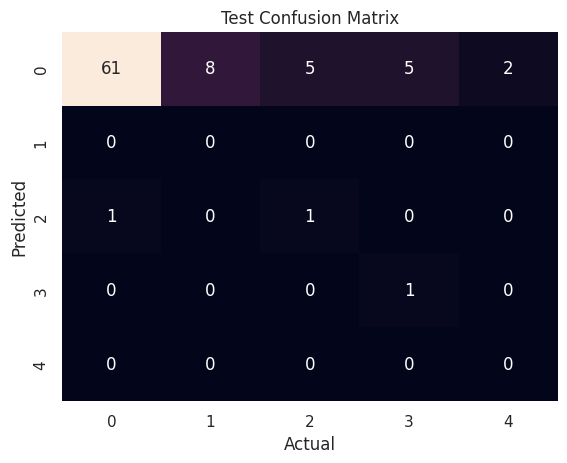

Classification report
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.50      0.17      0.25         6
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.45      0.26      0.28        84
weighted avg       0.66      0.75      0.67        84



In [ ]:
lr= LogisticRegression(C=.01,solver='lbfgs', multi_class='multinomial', random_state = 42)

lr_result=function_model("Logistic Regression",lr, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(lr_result)
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67


Model 2 KNN classifier

In [ ]:
#lets find best param for KNN
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7,9,11,13,15,7,19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2,3,4],
    'metric': ['minkowski','euclidean', 'manhattan']
}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Accuracy: 0.75


Model:  K Nearest Neighbour
Train Accuracy score:  0.7425149700598802
Test Accuracy score:  0.75


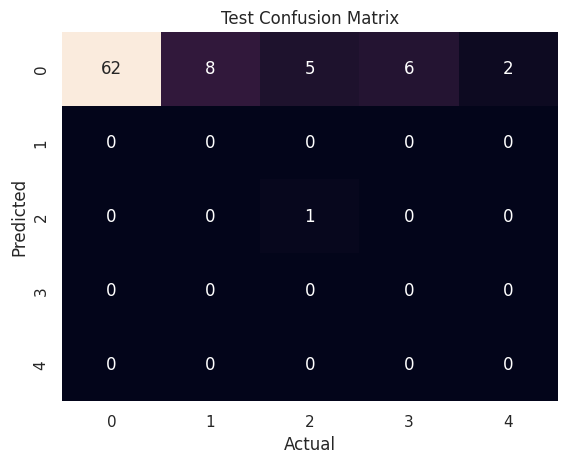

Classification report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.35      0.23      0.23        84
weighted avg       0.62      0.75      0.65        84



In [ ]:
knn=KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=1, weights='uniform', n_jobs=-1)

knn_result=function_model("K Nearest Neighbour",knn, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(knn_result)
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67
0,K Nearest Neighbour,0.74,0.75,0.62,0.75,0.65


Model 3 SVC

In [ ]:
#lets do grid search for SVC
mod_svm = svm.SVC()

param_grid = {
    'C': [0.1,1,10,100],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': [.01,0.1,1,10],
    #'degree':[2,3,4],
    'random_state':[42]
}

# Perform grid search
grid_search = GridSearchCV(mod_svm, param_grid, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 42}
Best Accuracy: 0.7380952380952381


Model:  SVC
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


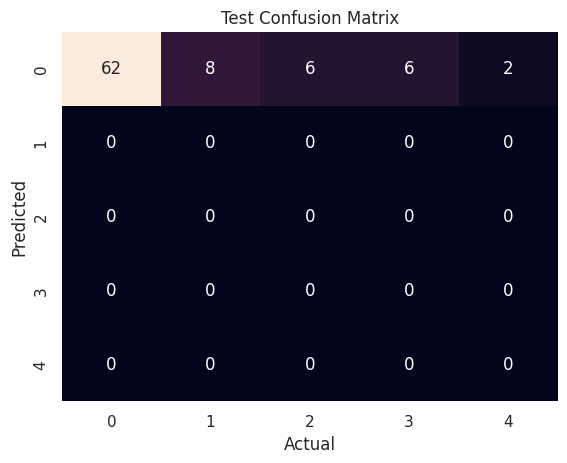

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
svc=svm.SVC(C=.1, degree=2, gamma=.01, kernel='rbf', random_state=42)

svc_result=function_model("SVC",svc, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(svc_result)
all_model_summary.reset_index(drop=True, inplace=True)

In [ ]:
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67
1,K Nearest Neighbour,0.74,0.75,0.62,0.75,0.65
2,SVC,0.74,0.74,0.54,0.74,0.63


Model 4- Decision Trees

In [ ]:
#lets do grid search for Decision trees
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [3,5,7,9],
    'random_state': [42],
    'min_samples_leaf': [3,5,10,15,20],
}


clf = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 3, 'random_state': 42}
Best Accuracy: 0.7380952380952381


Model:  Decision Tree
Train Accuracy score:  0.7514970059880239
Test Accuracy score:  0.7261904761904762


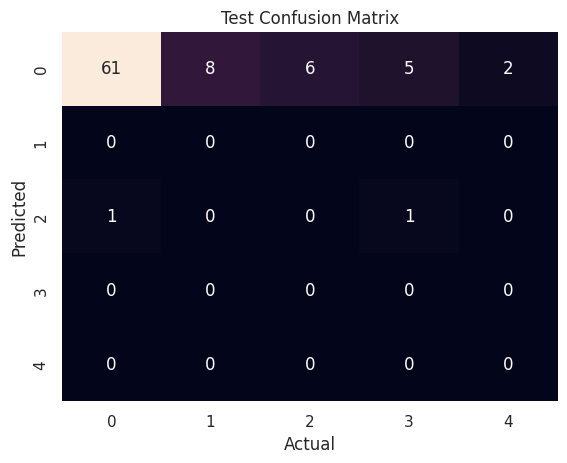

Classification report
              precision    recall  f1-score   support

           0       0.74      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.73      0.63        84



In [ ]:
dt=DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3, min_samples_leaf=10, min_samples_split=3)

dt_result=function_model("Decision Tree",dt, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(dt_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67
1,K Nearest Neighbour,0.74,0.75,0.62,0.75,0.65
2,SVC,0.74,0.74,0.54,0.74,0.63
3,Decision Tree,0.75,0.73,0.55,0.73,0.63


Model 5- Random Forest

In [ ]:
#lets do grid search for random forest
param_grid = {
    'n_estimators': [50,100,150],
    'criterion': ['gini'],
    'max_depth': [4,5,6,7,8],
    'min_samples_split': [15,20,25,30],
    'random_state': [42],
    'min_samples_leaf': [3,4,5,6],
    'max_features': ['sqrt', 'log2']
}

# Create a decision tree classifier
rf = RandomForestClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 50, 'random_state': 42}
Best Accuracy: 0.7380952380952381


Model:  Random Forest
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


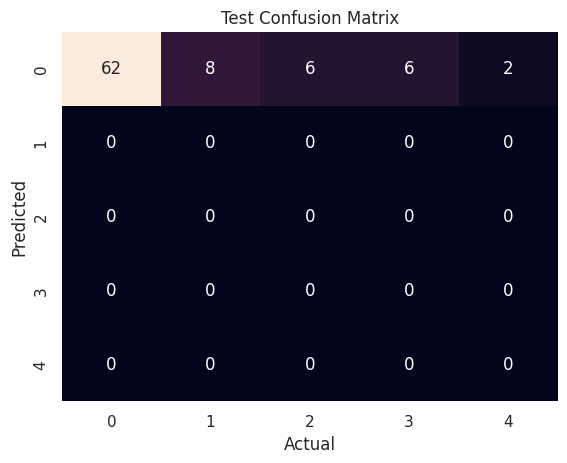

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
rf=RandomForestClassifier(criterion='gini', random_state=42, max_depth=4, min_samples_leaf=3, min_samples_split=15,
                                  n_estimators=100, max_features='sqrt')

rf_result=function_model("Random Forest",rf, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(rf_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67
1,K Nearest Neighbour,0.74,0.75,0.62,0.75,0.65
2,SVC,0.74,0.74,0.54,0.74,0.63
3,Decision Tree,0.75,0.73,0.55,0.73,0.63
4,Random Forest,0.74,0.74,0.54,0.74,0.63


Model 6- Adaboost

In [ ]:
#grid search for Adaboost
param_grid = {
    'n_estimators': [50,75,150,175],
    'learning_rate': [.001,.05,0.1,.5,.75,1],
    'random_state': [42]
}

# Create a decision tree classifier
adab = AdaBoostClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=adab, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.001, 'n_estimators': 50, 'random_state': 42}
Best Accuracy: 0.7380952380952381


Model:  Ada Boost
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


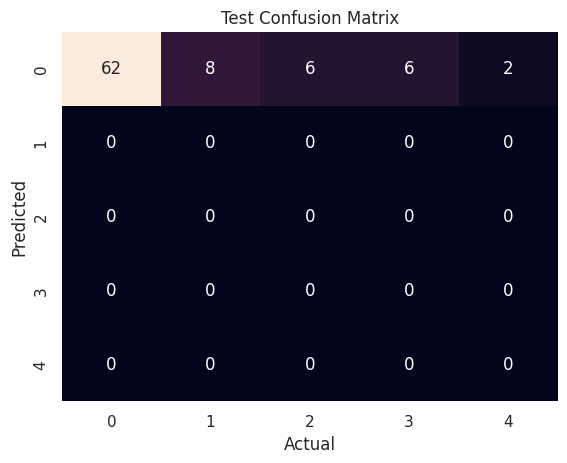

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
ada_boost= AdaBoostClassifier(random_state=42, n_estimators=75, learning_rate=.1)

ada_result=function_model("Ada Boost",ada_boost, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(ada_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67
1,K Nearest Neighbour,0.74,0.75,0.62,0.75,0.65
2,SVC,0.74,0.74,0.54,0.74,0.63
3,Decision Tree,0.75,0.73,0.55,0.73,0.63
4,Random Forest,0.74,0.74,0.54,0.74,0.63
5,Ada Boost,0.74,0.74,0.54,0.74,0.63


Model 7- Gradient Boosting

In [ ]:
#grid search for Gradient boosting
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1,.01],
    'max_depth': [3, 4,7],
    'random_state': [42],
    'subsample': [.5,.7,.9],
    #'min_samples_split': [3,4,5,6,10],
    #'min_samples_leaf': [2, 3,5,10],
    'max_features': ['auto', 'sqrt']
}

# Create a decision tree classifier
gradB = GradientBoostingClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=gradB, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50, 'random_state': 42, 'subsample': 0.5}
Best Accuracy: 0.7380952380952381


Model:  Gradient Boosting
Train Accuracy score:  0.7395209580838323
Test Accuracy score:  0.7380952380952381


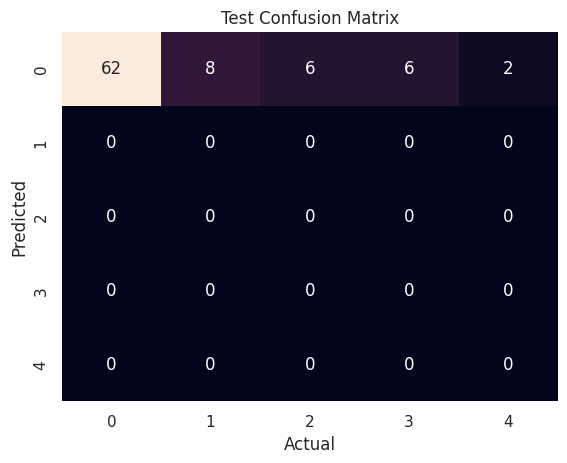

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
grad_boost= GradientBoostingClassifier(random_state=42, n_estimators=50, learning_rate=.01, max_depth=3, max_features='auto', subsample=.5)

gb_result=function_model("Gradient Boosting",grad_boost, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(gb_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67
1,K Nearest Neighbour,0.74,0.75,0.62,0.75,0.65
2,SVC,0.74,0.74,0.54,0.74,0.63
3,Decision Tree,0.75,0.73,0.55,0.73,0.63
4,Random Forest,0.74,0.74,0.54,0.74,0.63
5,Ada Boost,0.74,0.74,0.54,0.74,0.63
6,Gradient Boosting,0.74,0.74,0.54,0.74,0.63


In [ ]:
all_model_summary.to_pickle('dataframe.pickle')

Model 8- XGboost

In [ ]:
#lets try Grid search for XGboost
param_grid = {
    'booster': ['gbtree'], #, 'gblinear', 'dart'],
    'n_estimators': [30,50],
    'learning_rate': [0.01, 0.1], # , 0.5],
    'max_depth':  [5,6],
    'sampling_method': ['uniform'], #, 'gradient_based'],
    'reg_alpha': [0.1, 0.3],
    'reg_lambda': [0.1, 0.3]
}

xgb_clf = xgb.XGBClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

Best Hyperparameters: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'sampling_method': 'uniform'}
Best Accuracy: 0.7380952380952381


Model:  XGB
Train Accuracy score:  0.9970059880239521
Test Accuracy score:  0.75


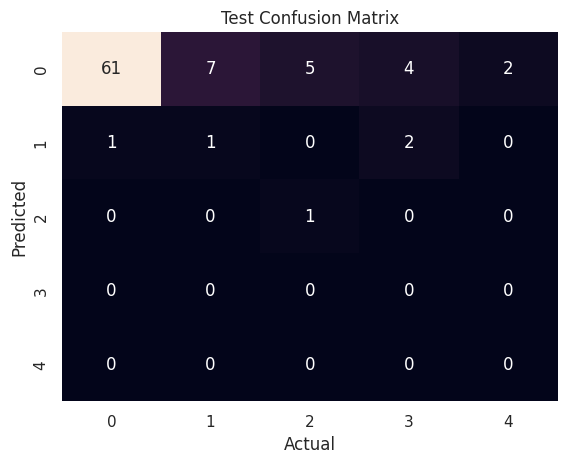

Classification report
              precision    recall  f1-score   support

           0       0.77      0.98      0.87        62
           1       0.25      0.12      0.17         8
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.40      0.26      0.26        84
weighted avg       0.67      0.75      0.67        84



In [ ]:
xgb_clf = xgb.XGBClassifier(booster='gbtree', learning_rate=.1, max_depth=6, n_estimator=50, sampling_method='uniform', reg_alpha=.7, reg_lambda=.7)

xgb_result=function_model("XGB",xgb_clf, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(xgb_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67
1,K Nearest Neighbour,0.74,0.75,0.62,0.75,0.65
2,SVC,0.74,0.74,0.54,0.74,0.63
3,Decision Tree,0.75,0.73,0.55,0.73,0.63
4,Random Forest,0.74,0.74,0.54,0.74,0.63
5,Ada Boost,0.74,0.74,0.54,0.74,0.63
6,Gradient Boosting,0.74,0.74,0.54,0.74,0.63
7,XGB,1.00,0.75,0.67,0.75,0.67


In [ ]:
all_model_summary.to_pickle('dataframe.pickle')

 Model 9- Lightgbm

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.5, 0.3],
    'reg_lambda': [0.5, 0.3]
}

# Initialize the LGBMClassifier
lgbm_clf = LGBMClassifier()


# Perform grid search
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_std, y_train)

# Get the best hyperparameter values and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test_std, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22572
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 226
[LightGBM] [Info] Start training from score -0.301753
[LightGBM] [Info] Start training from score -2.345405
[LightGBM] [Info] Start training from score -2.592265
[LightGBM] [Info] Start training from score -2.633087
[LightGBM] [Info] Start training from score -4.019382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

Model:  Light GBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22572
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 226
[LightGBM] [Info] Start training from score -0.301753
[LightGBM] [Info] Start training from score -2.345405
[LightGBM] [Info] Start training from score -2.592265
[LightGBM] [Info] Start training from score -2.633087
[LightGBM] [Info] Start training from score -4.019382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

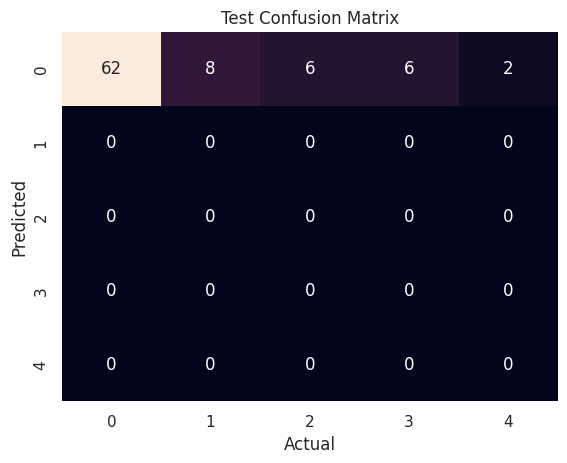

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [ ]:
lgbm = LGBMClassifier(colsample_bytree=.8, learning_rate=.01, max_depth=3, n_estimators=50, reg_alpha=.5, reg_lambda=.5)

lgbm_result=function_model("Light GBM",lgbm, X_train_std, y_train, X_test_std, y_test)

In [ ]:
all_model_summary=all_model_summary.append(lgbm_result)
all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67
1,K Nearest Neighbour,0.74,0.75,0.62,0.75,0.65
2,SVC,0.74,0.74,0.54,0.74,0.63
3,Decision Tree,0.75,0.73,0.55,0.73,0.63
4,Random Forest,0.74,0.74,0.54,0.74,0.63
5,Ada Boost,0.74,0.74,0.54,0.74,0.63
6,Gradient Boosting,0.74,0.74,0.54,0.74,0.63
7,XGB,1.00,0.75,0.67,0.75,0.67
8,Light GBM,0.74,0.74,0.54,0.74,0.63


In [290]:
all_model_summary.to_pickle('dataframe.pickle')
all_model_summary.to_pickle('dataframe_original_data.pickle')

### Trying Basic Models on Upsampled data

In [291]:
X.shape, y.shape

((418, 264), (418, 1))

In [292]:
X.head(1)

,Year,Month,Day,WeekofYear,is_holiday,Country_Country_02,Country_Country_03,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Mining,Industry Sector_Others,Gender_Male,Employee Type_Third Party,Employee Type_Third Party (Remote),Critical Risk_Bees,Critical Risk_Blocking and isolation of energies,Critical Risk_Burn,Critical Risk_Chemical substances,Critical Risk_Confined space,Critical Risk_Cut,Critical Risk_Electrical Shock,Critical Risk_Electrical installation,Critical Risk_Fall,Critical Risk_Fall prevention,Critical Risk_Fall prevention (same level),Critical Risk_Individual protection equipment,Critical Risk_Liquid Metal,Critical Risk_Machine Protection,Critical Risk_Manual Tools,Critical Risk_Others,Critical Risk_Plates,Critical Risk_Poll,Critical Risk_Power lock,Critical Risk_Pressed,Critical Risk_Pressurized Systems,Critical Risk_Pressurized Systems / Chemical Substances,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,season_Spring,season_Summer,season_Winter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,2016,1,1,53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.67,19.93,-0.02,-11.31,4.04,18.14,-20.14,-6.10,-8.21,4.63,3.11,15.66,10.79,6.70,26.09,-4.53,1.19,9.09,-2.72,-3.46,12.15,190.84,9.77,-0.78,7.47,6.58,-11.65,6.54,-0.95,0.20,7.98,-12.03,-0.97,0.98,-2.10,-9.37,-41.08,-20.13,-11.45,-5.36,7.23,-10.80,4.97,21.31,-2.24,20.89,18.45,8.54,8.90,25.43,-3.23,1.49,1.05,12.76,7.87,-1.14,-4.37,1.10,-7.29,1.75,8.16,-5.17,-25.68,-5.67,11.25,3.77,-7.76,5.77,1.05,-3.76,25.22,1.71,12.38,11.06,-8.73,29.33,-4.13,-1.59,-0.69,-6.89,2.70,-10.90,-14.63,6.54,6.32,-1.95,-12.52,-19.81,43.11,-42.60,6.03,4.27,21.24,3.14,-11.58,2.93,13.89,-4.29,-1.77,-8.97,-3.26,0.65,-0.18,6.51,-6.15,-10.93,4.11,71.02,-10.99,-4.04,-5.59,-11.30,2.55,12.96,6.92,-1.62,1.80,-7.94,-12.47,-4.87,14.83,4.63,3.98,14.47,3.33,-29.71,19.52,9.04,-1.27,0.75,-13.11,19.56,14.75,-23.56,-3.28,15.42,2.83,-12.38,-8.16,-8.13,-1.44,8.98,9.91,-4.95,80.26,7.33,-9.03,-14.68,1.33,7.16,5.42,14.30,1.88,-12.86,14.71,5.82,-14.77,20.58,-6.51,-35.25,9.24,-6.12,-12.51,1.72,-2.21,7.77,-14.43,-3.10,-20.84,37.39,6.31,7.50,14.83,-10.61,2.97,0.99,-8.24,-26.16,-0.57,0.48,66.47,-17.27,-3.35,2.47,-5.73,-11.07,-8.87,4.73,6.53,23.39,-4.08,10.43,-12.26,15.43,-1.27,1.52,-0.27,5.65,-9.59,16.00


In [293]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote= smote.fit_resample(X_train, y_train)

In [294]:
X_train_smote.head(1)

,Year,Month,Day,WeekofYear,is_holiday,Country_Country_02,Country_Country_03,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Mining,Industry Sector_Others,Gender_Male,Employee Type_Third Party,Employee Type_Third Party (Remote),Critical Risk_Bees,Critical Risk_Blocking and isolation of energies,Critical Risk_Burn,Critical Risk_Chemical substances,Critical Risk_Confined space,Critical Risk_Cut,Critical Risk_Electrical Shock,Critical Risk_Electrical installation,Critical Risk_Fall,Critical Risk_Fall prevention,Critical Risk_Fall prevention (same level),Critical Risk_Individual protection equipment,Critical Risk_Liquid Metal,Critical Risk_Machine Protection,Critical Risk_Manual Tools,Critical Risk_Others,Critical Risk_Plates,Critical Risk_Poll,Critical Risk_Power lock,Critical Risk_Pressed,Critical Risk_Pressurized Systems,Critical Risk_Pressurized Systems / Chemical Substances,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,season_Spring,season_Summer,season_Winter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,2016,6,10,23,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.81,-1.65,-5.14,-9.69,-0.15,4.13,-9.99,-5.60,3.87,0.63,3.83,8.38,2.95,5.02,11.75,-2.51,-1.94,8.50,-1.15,-4.10,10.89,90.24,4.39,-1.64,2.86,6.08,-5.36,-0.27,-3.11,-2.12,-0.63,0.71,-2.20,2.31,0.19,-4.43,-20.56,-13.03,-8.78,-0.57,-0.45,-4.41,-1.48,12.82,-2.84,3.83,4.87,2.94,0.82,8.92,0.23,4.16,-1.99,8.01,4.43,0.52,-0.31,-0.37,0.90,2.84,0.28,0.73,-12.25,-2.59,4.63,-0.93,-3.31,-1.61,0.98,-2.07,4.20,-4.51,3.45,7.95,-3.40,9.12,-0.95,-4.63,-2.74,-2.24,0.68,-8.48,-5.58,1.88,6.15,3.65,-3.16,-12.01,14.88,-21.82,2.75,4.42,6.66,3.31,-7.28,0.22,0.23,-5.04,0.08,3.05,-3.67,-3.17,-3.70,6.73,-6.13,-9.47,4.01,31.45,-7.61,-0.44,-2.29,-6.51,-0.95,0.57,4.76,2.01,-3.20,-2.37,-3.69,-6.22,7.25,4.38,1.71,7.00,7.81,-13.54,8.04,2.66,3.39,-2.32,-2.57,5.60,10.67,-12.71,3.47,8.87,2.77,-4.99,-11.07,-1.16,1.10,1.97,4.33,-5.62,46.71,6.58,3.42,-9.78,5.09,1.28,3.62,6.03,-0.55,-5.91,2.34,-2.82,-3.72,8.18,-1.98,-14.60,1.90,2.67,-1.06,-1.47,-0.48,0.94,-1.38,0.77,-13.99,16.47,3.13,-0.56,11.24,-1.03,4.38,6.48,0.06,-7.40,7.11,-2.76,29.91,-6.12,-4.04,5.83,-2.79,-11.26,-5.57,0.88,3.21,10.36,2.05,5.50,-5.14,5.31,4.07,-0.02,0.63,6.38,-9.76,6.88


In [295]:
X_train_smote.shape, y_train_smote.shape

((1235, 264), (1235, 1))

In [296]:
y_train_smote.value_counts()

Accident Level
0                 247
1                 247
2                 247
3                 247
4                 247
dtype: int64

In [297]:
y_train_smote.value_counts(normalize=True)

Accident Level
0                0.20
1                0.20
2                0.20
3                0.20
4                0.20
dtype: float64

In [298]:
y_test.value_counts(normalize=True)

Accident Level
0                0.74
1                0.10
2                0.07
3                0.07
4                0.02
dtype: float64

In [299]:
ss_smote = StandardScaler()

X_train_smote_std= ss_smote.fit_transform(X_train_smote)

X_test_smote_std = ss_smote.transform(X_test)

X_train_smote_std=pd.DataFrame(X_train_smote_std, columns= X_train_smote.columns)
X_test_smote_std=pd.DataFrame(X_test_smote_std, columns= X_test.columns)

In [300]:
X_train_smote_std.head(1)

,Year,Month,Day,WeekofYear,is_holiday,Country_Country_02,Country_Country_03,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Mining,Industry Sector_Others,Gender_Male,Employee Type_Third Party,Employee Type_Third Party (Remote),Critical Risk_Bees,Critical Risk_Blocking and isolation of energies,Critical Risk_Burn,Critical Risk_Chemical substances,Critical Risk_Confined space,Critical Risk_Cut,Critical Risk_Electrical Shock,Critical Risk_Electrical installation,Critical Risk_Fall,Critical Risk_Fall prevention,Critical Risk_Fall prevention (same level),Critical Risk_Individual protection equipment,Critical Risk_Liquid Metal,Critical Risk_Machine Protection,Critical Risk_Manual Tools,Critical Risk_Others,Critical Risk_Plates,Critical Risk_Poll,Critical Risk_Power lock,Critical Risk_Pressed,Critical Risk_Pressurized Systems,Critical Risk_Pressurized Systems / Chemical Substances,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,season_Spring,season_Summer,season_Winter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.51,0.36,-0.56,0.20,-0.05,2.27,-0.18,-0.13,-0.34,-0.27,5.08,-0.19,-0.09,-0.14,-0.04,-0.18,-0.03,-0.06,-1.01,-0.19,0.19,-0.74,3.80,-0.08,-0.04,-0.03,-0.11,-0.03,-0.09,-0.03,-0.03,-0.09,-0.07,-0.06,-0.03,-0.04,-0.03,9.02,-0.76,0.00,-0.03,-0.15,-0.11,-0.07,-0.05,-0.09,-0.03,-0.03,-0.03,0.00,-0.07,-0.03,-0.08,-0.09,-0.06,-0.22,-0.30,-0.19,-0.24,-0.24,-0.30,-0.27,-0.61,-0.20,-1.16,-1.97,0.24,0.69,-0.36,-1.22,0.97,0.58,0.95,0.23,-0.67,-0.51,-0.83,-1.16,-1.07,-0.27,0.10,-0.60,0.19,0.97,-0.30,-1.09,-0.07,1.08,-1.13,1.39,0.95,-1.38,0.04,-1.51,-1.38,1.78,-0.39,0.64,0.19,0.83,0.91,0.82,-0.49,0.90,0.32,1.30,-1.03,-0.76,0.64,-1.35,-1.28,-0.26,-1.11,-1.34,1.32,0.60,-0.40,-1.00,-0.12,-0.15,0.70,-1.07,1.66,0.67,-0.86,1.15,0.91,0.72,-0.86,-0.59,1.19,-0.87,0.61,0.02,-1.60,-0.65,-1.17,-0.67,0.57,-1.27,0.47,0.72,0.48,1.15,0.02,0.94,1.17,-1.26,-0.47,0.33,0.98,0.78,-1.44,0.91,-0.76,-0.70,-1.24,0.85,0.26,-0.99,-1.78,0.33,0.04,2.34,-0.57,-0.89,-1.82,-0.35,0.41,0.63,-0.18,-1.18,0.89,-0.28,0.18,0.68,-1.34,-1.62,-0.92,0.65,-1.60,0.67,1.24,-0.11,-0.83,-0.43,-0.74,-0.67,-0.34,1.18,-1.13,-1.35,0.30,0.59,1.23,-0.91,-0.74,1.01,0.71,-0.40,-0.27,1.12,0.22,0.12,0.72,-1.12,-1.14,0.16,-0.90,-0.42,1.99,0.67,0.48,-0.48,-0.51,-0.85,0.34,0.96,-1.49,-0.66,1.30,-0.81,0.92,1.25,-0.27,1.31,1.71,-1.24,1.28,-1.25,1.12,-0.02,0.96,-1.09,-0.28,-1.73,-0.70,1.19,-0.21,1.42,0.54,1.40,0.46,-0.76,-1.15,1.03,0.87,0.54,0.23,0.76,0.67,-0.93,-0.26,-1.08,1.89,-0.51,0.81,-0.90,-0.12,-0.78,-0.56,-0.88,0.39,-0.82


In [301]:
X_train_smote_std.shape, y_train_smote.shape

((1235, 264), (1235, 1))

In [302]:
X_test_smote_std.shape, y_test.shape

((84, 264), (84, 1))

Logistic regression Smote

Model:  Logistic Regression SMOTE
Train Accuracy score:  0.962753036437247
Test Accuracy score:  0.6666666666666666


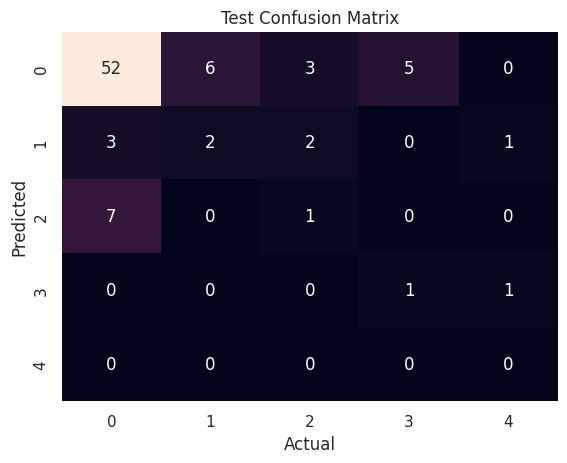

Classification report
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        62
           1       0.25      0.25      0.25         8
           2       0.12      0.17      0.14         6
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         2

    accuracy                           0.67        84
   macro avg       0.33      0.28      0.29        84
weighted avg       0.65      0.67      0.65        84



In [303]:
lr_smote_result=function_model("Logistic Regression SMOTE",lr, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

KNN Smote

Model:  K Nearest Neighbour SMOTE
Train Accuracy score:  0.8242914979757086
Test Accuracy score:  0.13095238095238096


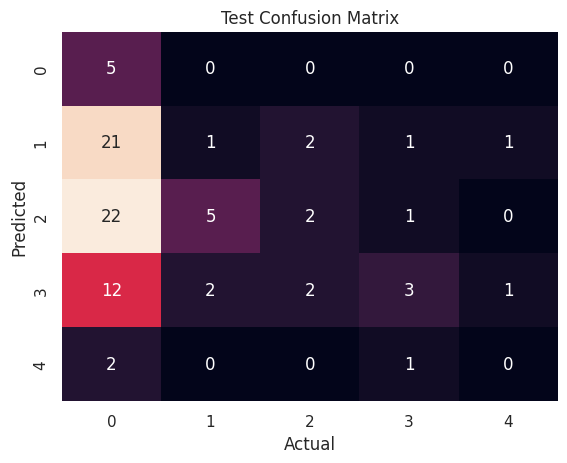

Classification report
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        62
           1       0.04      0.12      0.06         8
           2       0.07      0.33      0.11         6
           3       0.15      0.50      0.23         6
           4       0.00      0.00      0.00         2

    accuracy                           0.13        84
   macro avg       0.25      0.21      0.11        84
weighted avg       0.76      0.13      0.14        84



In [304]:
knn_smote_result=function_model("K Nearest Neighbour SMOTE",knn,X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

SVC Smote

Model:  SVC SMOTE
Train Accuracy score:  0.8696356275303644
Test Accuracy score:  0.7142857142857143


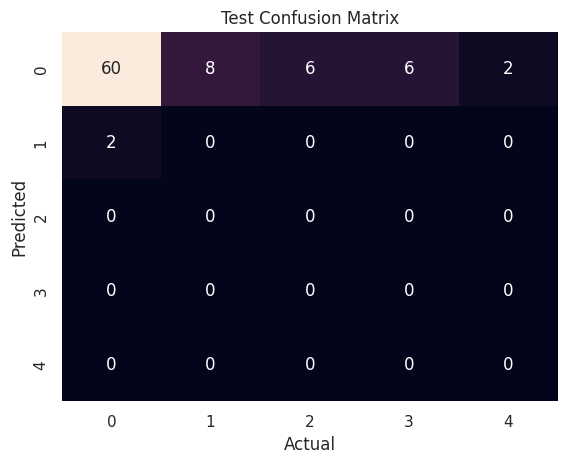

Classification report
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.54      0.71      0.62        84



In [305]:
svc_smote_result=function_model("SVC SMOTE",svc, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

Decision Trees Smote

Model:  Decision Tree SMOTE
Train Accuracy score:  0.5797570850202429
Test Accuracy score:  0.07142857142857142


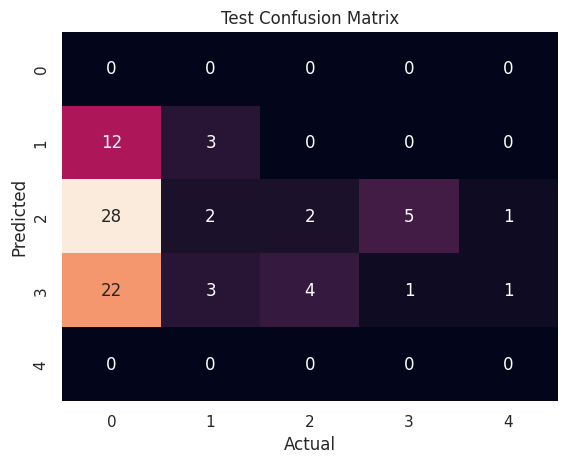

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.20      0.38      0.26         8
           2       0.05      0.33      0.09         6
           3       0.03      0.17      0.05         6
           4       0.00      0.00      0.00         2

    accuracy                           0.07        84
   macro avg       0.06      0.17      0.08        84
weighted avg       0.03      0.07      0.04        84



In [306]:
dt_smote_result=function_model("Decision Tree SMOTE",dt, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

Random Forest Smote

Model:  Random Forest SMOTE
Train Accuracy score:  0.8817813765182186
Test Accuracy score:  0.4166666666666667


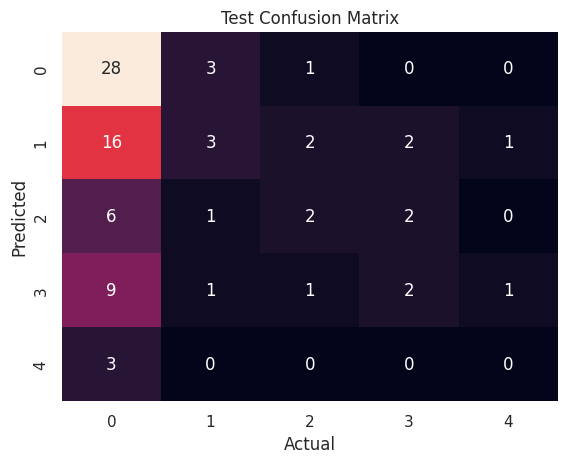

Classification report
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        62
           1       0.12      0.38      0.19         8
           2       0.18      0.33      0.24         6
           3       0.14      0.33      0.20         6
           4       0.00      0.00      0.00         2

    accuracy                           0.42        84
   macro avg       0.26      0.30      0.24        84
weighted avg       0.68      0.42      0.49        84



In [307]:
rf_smote_result=function_model("Random Forest SMOTE",rf, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

Ada Boost Smote

Model:  Ada Boost SMOTE
Train Accuracy score:  0.6380566801619433
Test Accuracy score:  0.4880952380952381


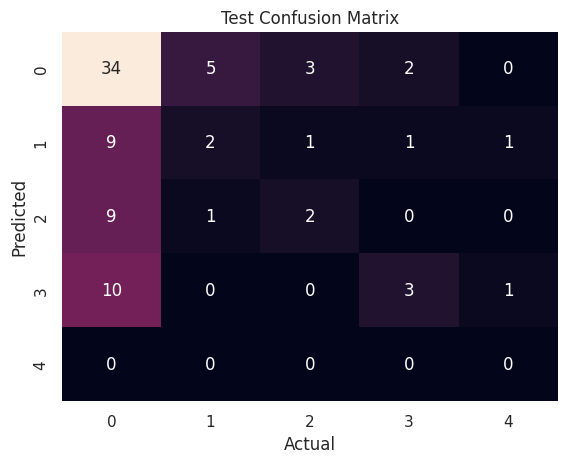

Classification report
              precision    recall  f1-score   support

           0       0.77      0.55      0.64        62
           1       0.14      0.25      0.18         8
           2       0.17      0.33      0.22         6
           3       0.21      0.50      0.30         6
           4       0.00      0.00      0.00         2

    accuracy                           0.49        84
   macro avg       0.26      0.33      0.27        84
weighted avg       0.61      0.49      0.53        84



In [308]:
ada_smote_result=function_model("Ada Boost SMOTE",ada_boost, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

Model:  Gradient Boosting SMOTE
Train Accuracy score:  0.9441295546558705
Test Accuracy score:  0.5119047619047619


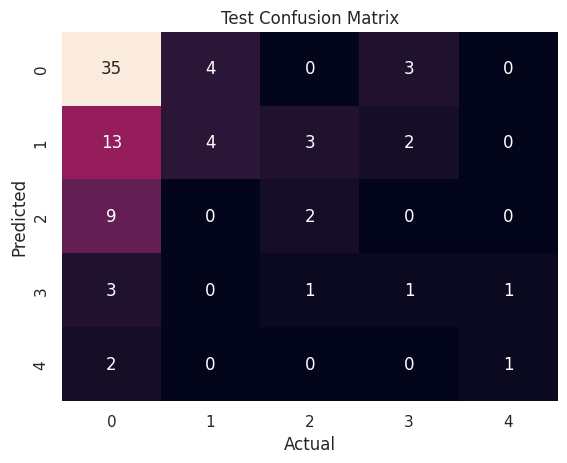

Classification report
              precision    recall  f1-score   support

           0       0.83      0.56      0.67        62
           1       0.18      0.50      0.27         8
           2       0.18      0.33      0.24         6
           3       0.17      0.17      0.17         6
           4       0.33      0.50      0.40         2

    accuracy                           0.51        84
   macro avg       0.34      0.41      0.35        84
weighted avg       0.67      0.51      0.56        84



In [309]:
gb_smote_result=function_model("Gradient Boosting SMOTE",grad_boost, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

XGB Smote

Model:  XGB SMOTE
Train Accuracy score:  0.9991902834008097
Test Accuracy score:  0.7142857142857143


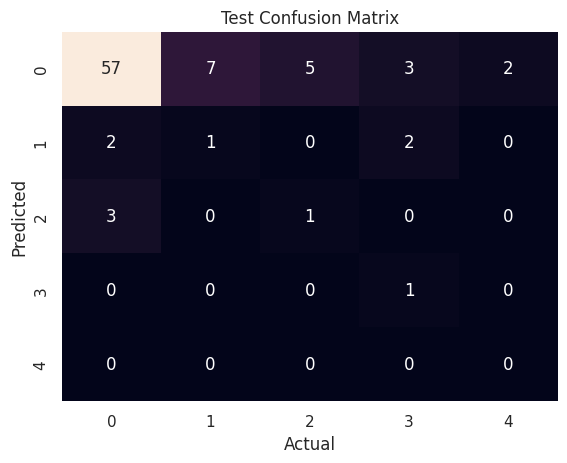

Classification report
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        62
           1       0.20      0.12      0.15         8
           2       0.25      0.17      0.20         6
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.44      0.28      0.30        84
weighted avg       0.68      0.71      0.67        84



In [310]:
xgb_smote_result=function_model("XGB SMOTE",xgb_clf, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

LGBM Smote

Model:  Light GBM SMOTE
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51177
[LightGBM] [Info] Number of data points in the train set: 1235, number of used features: 229
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

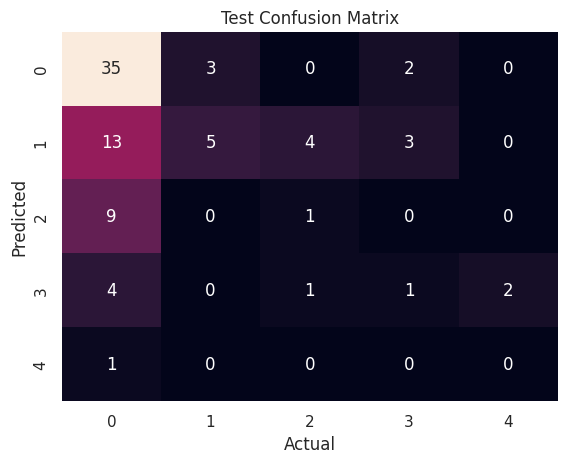

Classification report
              precision    recall  f1-score   support

           0       0.88      0.56      0.69        62
           1       0.20      0.62      0.30         8
           2       0.10      0.17      0.12         6
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         2

    accuracy                           0.50        84
   macro avg       0.26      0.30      0.25        84
weighted avg       0.68      0.50      0.55        84



In [311]:
lgbm_smote_result=function_model("Light GBM SMOTE",lgbm, X_train_smote_std, y_train_smote, X_test_smote_std, y_test)

In [312]:
all_model_summary=all_model_summary.append(lr_smote_result)
all_model_summary=all_model_summary.append(knn_smote_result)
all_model_summary=all_model_summary.append(svc_smote_result)
all_model_summary=all_model_summary.append(dt_smote_result)
all_model_summary=all_model_summary.append(rf_smote_result)
all_model_summary=all_model_summary.append(ada_smote_result)
all_model_summary=all_model_summary.append(gb_smote_result)
all_model_summary=all_model_summary.append(xgb_smote_result)
all_model_summary=all_model_summary.append(lgbm_smote_result)


all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67
1,K Nearest Neighbour,0.74,0.75,0.62,0.75,0.65
2,SVC,0.74,0.74,0.54,0.74,0.63
3,Decision Tree,0.75,0.73,0.55,0.73,0.63
4,Random Forest,0.74,0.74,0.54,0.74,0.63
5,Ada Boost,0.74,0.74,0.54,0.74,0.63
6,Gradient Boosting,0.74,0.74,0.54,0.74,0.63
7,XGB,1.00,0.75,0.67,0.75,0.67
8,Light GBM,0.74,0.74,0.54,0.74,0.63
9,Logistic Regression SMOTE,0.96,0.67,0.65,0.67,0.65


In [325]:
all_model_summary.to_pickle('dataframe.pickle')
all_model_summary.to_pickle('dataframe_original_smote.pickle')

### Try Basic models on Downsampled data

In [315]:
X.shape, y.shape

((418, 264), (418, 1))

In [316]:
X.head(1)

,Year,Month,Day,WeekofYear,is_holiday,Country_Country_02,Country_Country_03,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Mining,Industry Sector_Others,Gender_Male,Employee Type_Third Party,Employee Type_Third Party (Remote),Critical Risk_Bees,Critical Risk_Blocking and isolation of energies,Critical Risk_Burn,Critical Risk_Chemical substances,Critical Risk_Confined space,Critical Risk_Cut,Critical Risk_Electrical Shock,Critical Risk_Electrical installation,Critical Risk_Fall,Critical Risk_Fall prevention,Critical Risk_Fall prevention (same level),Critical Risk_Individual protection equipment,Critical Risk_Liquid Metal,Critical Risk_Machine Protection,Critical Risk_Manual Tools,Critical Risk_Others,Critical Risk_Plates,Critical Risk_Poll,Critical Risk_Power lock,Critical Risk_Pressed,Critical Risk_Pressurized Systems,Critical Risk_Pressurized Systems / Chemical Substances,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,season_Spring,season_Summer,season_Winter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,2016,1,1,53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.67,19.93,-0.02,-11.31,4.04,18.14,-20.14,-6.10,-8.21,4.63,3.11,15.66,10.79,6.70,26.09,-4.53,1.19,9.09,-2.72,-3.46,12.15,190.84,9.77,-0.78,7.47,6.58,-11.65,6.54,-0.95,0.20,7.98,-12.03,-0.97,0.98,-2.10,-9.37,-41.08,-20.13,-11.45,-5.36,7.23,-10.80,4.97,21.31,-2.24,20.89,18.45,8.54,8.90,25.43,-3.23,1.49,1.05,12.76,7.87,-1.14,-4.37,1.10,-7.29,1.75,8.16,-5.17,-25.68,-5.67,11.25,3.77,-7.76,5.77,1.05,-3.76,25.22,1.71,12.38,11.06,-8.73,29.33,-4.13,-1.59,-0.69,-6.89,2.70,-10.90,-14.63,6.54,6.32,-1.95,-12.52,-19.81,43.11,-42.60,6.03,4.27,21.24,3.14,-11.58,2.93,13.89,-4.29,-1.77,-8.97,-3.26,0.65,-0.18,6.51,-6.15,-10.93,4.11,71.02,-10.99,-4.04,-5.59,-11.30,2.55,12.96,6.92,-1.62,1.80,-7.94,-12.47,-4.87,14.83,4.63,3.98,14.47,3.33,-29.71,19.52,9.04,-1.27,0.75,-13.11,19.56,14.75,-23.56,-3.28,15.42,2.83,-12.38,-8.16,-8.13,-1.44,8.98,9.91,-4.95,80.26,7.33,-9.03,-14.68,1.33,7.16,5.42,14.30,1.88,-12.86,14.71,5.82,-14.77,20.58,-6.51,-35.25,9.24,-6.12,-12.51,1.72,-2.21,7.77,-14.43,-3.10,-20.84,37.39,6.31,7.50,14.83,-10.61,2.97,0.99,-8.24,-26.16,-0.57,0.48,66.47,-17.27,-3.35,2.47,-5.73,-11.07,-8.87,4.73,6.53,23.39,-4.08,10.43,-12.26,15.43,-1.27,1.52,-0.27,5.65,-9.59,16.00


In [317]:
tomek = TomekLinks(sampling_strategy='majority')

In [318]:
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

In [319]:
X_train.shape, y_train.shape

((334, 264), (334, 1))

In [320]:
X_train_tomek.shape, y_train_tomek.shape

((312, 264), (312, 1))

In [321]:
y_train_tomek.value_counts()

Accident Level
0                 225
1                  32
2                  25
3                  24
4                   6
dtype: int64

In [322]:
y_train_tomek.value_counts(normalize=True)

Accident Level
0                0.72
1                0.10
2                0.08
3                0.08
4                0.02
dtype: float64

In [323]:
y_test.value_counts(normalize=True)

Accident Level
0                0.74
1                0.10
2                0.07
3                0.07
4                0.02
dtype: float64

In [329]:
ss_tomek = StandardScaler()

X_train_tomek_std= ss_tomek.fit_transform(X_train_tomek)
X_test_tomek_std = ss_tomek.transform(X_test)

In [330]:
X_train_tomek_std=pd.DataFrame(X_train_tomek_std, columns= X_train_tomek.columns)
X_test_tomek_std=pd.DataFrame(X_test_tomek_std, columns= X_test.columns)


In [331]:
X_train_tomek_std.head(1)

,Year,Month,Day,WeekofYear,is_holiday,Country_Country_02,Country_Country_03,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Mining,Industry Sector_Others,Gender_Male,Employee Type_Third Party,Employee Type_Third Party (Remote),Critical Risk_Bees,Critical Risk_Blocking and isolation of energies,Critical Risk_Burn,Critical Risk_Chemical substances,Critical Risk_Confined space,Critical Risk_Cut,Critical Risk_Electrical Shock,Critical Risk_Electrical installation,Critical Risk_Fall,Critical Risk_Fall prevention,Critical Risk_Fall prevention (same level),Critical Risk_Individual protection equipment,Critical Risk_Liquid Metal,Critical Risk_Machine Protection,Critical Risk_Manual Tools,Critical Risk_Others,Critical Risk_Plates,Critical Risk_Poll,Critical Risk_Power lock,Critical Risk_Pressed,Critical Risk_Pressurized Systems,Critical Risk_Pressurized Systems / Chemical Substances,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,season_Spring,season_Summer,season_Winter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.66,0.21,-0.61,0.13,-0.10,1.55,-0.33,-0.25,-0.53,-0.39,2.61,-0.36,-0.16,-0.27,-0.08,-0.33,-0.06,-0.10,-1.15,-0.36,0.24,-0.93,2.54,-0.16,-0.08,-0.06,-0.22,0.00,-0.17,-0.06,-0.06,-0.15,-0.11,-0.13,-0.06,-0.08,-0.06,4.61,-1.15,0.00,-0.06,-0.10,-0.20,-0.14,-0.10,-0.17,-0.06,-0.06,-0.06,0.00,-0.13,-0.06,-0.16,-0.16,-0.11,-0.36,-0.40,-0.33,-0.47,-0.46,-0.43,-0.39,-0.84,-0.36,-1.14,-1.74,0.11,0.48,-0.19,-0.82,0.70,0.29,1.04,0.23,-0.43,-0.35,-0.57,-0.67,-0.77,-0.51,0.12,-0.43,0.20,0.69,-0.12,-0.82,-0.15,0.80,-0.84,1.53,0.76,-1.09,-0.01,-1.05,-1.09,1.55,-0.42,0.47,0.07,0.77,0.65,0.52,-0.68,0.78,0.04,0.92,-0.90,-0.51,0.38,-1.11,-1.12,-0.14,-0.72,-1.01,1.11,0.41,-0.46,-0.81,0.03,-0.08,0.45,-0.89,1.28,0.56,-0.63,0.88,0.63,0.40,-0.59,-0.91,0.85,-0.72,0.65,0.18,-1.29,-0.66,-0.92,-0.36,0.41,-0.92,0.47,0.50,0.23,0.89,0.03,0.61,0.83,-0.90,-0.18,0.35,0.78,0.61,-1.07,0.69,-0.48,-0.44,-1.03,0.72,0.05,-0.71,-1.27,0.18,0.06,1.84,-0.68,-0.68,-1.42,-0.13,0.24,0.27,0.21,-0.91,0.59,-0.11,0.08,0.37,-1.21,-1.40,-0.72,0.53,-1.37,0.45,0.91,-0.05,-0.57,-0.22,-0.59,-0.35,-0.08,0.90,-0.75,-0.90,0.49,0.38,1.03,-0.67,-0.50,0.81,0.50,-0.12,-0.04,0.90,-0.04,0.01,0.53,-0.77,-0.87,-0.14,-0.63,-0.26,1.51,0.48,0.51,-0.38,-0.30,-0.64,0.34,0.62,-1.12,-0.99,0.98,-0.56,0.73,0.87,-0.36,1.08,1.18,-0.99,1.05,-0.91,0.81,-0.14,0.69,-0.76,0.01,-1.32,-0.41,0.87,0.04,1.34,0.53,1.12,0.72,-0.79,-0.88,0.74,0.72,0.45,0.08,0.47,0.42,-0.66,-0.13,-0.88,1.38,-0.24,0.63,-0.67,0.05,-0.57,-0.38,-0.65,0.17,-0.48


In [332]:
X_train_tomek_std.shape, y_train_tomek.shape


((312, 264), (312, 1))

In [333]:
X_test_tomek_std.shape, y_test.shape

((84, 264), (84, 1))

Logistic Regression Tomek (Undersampling)

Model:  Logistic Regression tomek (Undersampling)
Train Accuracy score:  0.7916666666666666
Test Accuracy score:  0.75


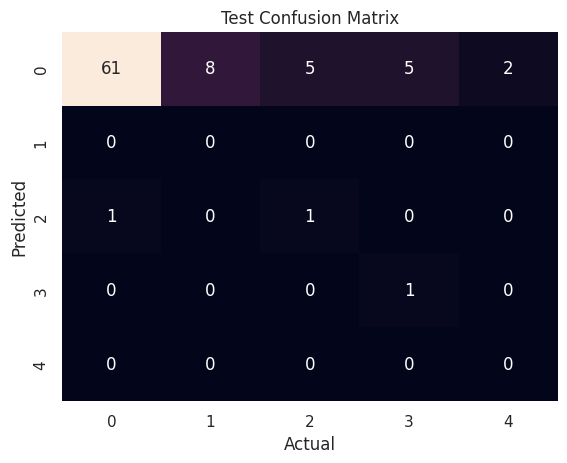

Classification report
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        62
           1       0.00      0.00      0.00         8
           2       0.50      0.17      0.25         6
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.45      0.26      0.28        84
weighted avg       0.66      0.75      0.67        84



In [334]:
lr_tomek_result=function_model("Logistic Regression tomek (Undersampling)",lr, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

KNN Tomek (Undersampling)

Model:  K Nearest Neighbour tomek(Undersampling)
Train Accuracy score:  0.7339743589743589
Test Accuracy score:  0.75


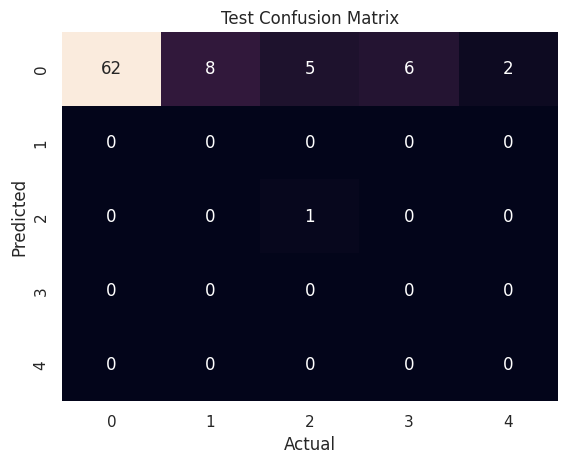

Classification report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.35      0.23      0.23        84
weighted avg       0.62      0.75      0.65        84



In [335]:
knn_tomek_result=function_model("K Nearest Neighbour tomek(Undersampling)",knn,X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

SVC Tomek (Undersampling)

Model:  SVC tomek (Undersampling)
Train Accuracy score:  0.7211538461538461
Test Accuracy score:  0.7380952380952381


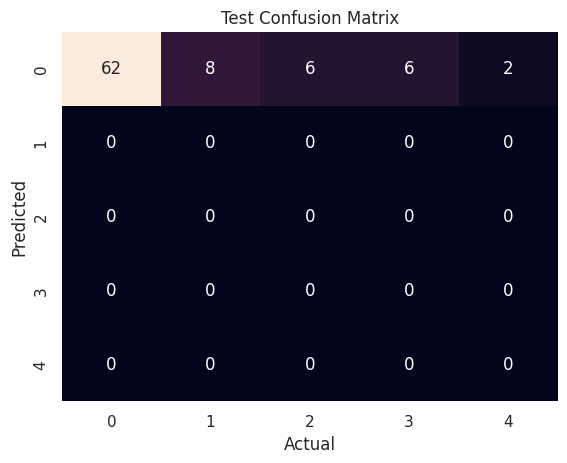

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [336]:
svc_tomek_result=function_model("SVC tomek (Undersampling)",svc, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

Decision Trees Tomek (Undersampling)

Model:  Decision Tree tomek (Undersampling)
Train Accuracy score:  0.7371794871794872
Test Accuracy score:  0.7142857142857143


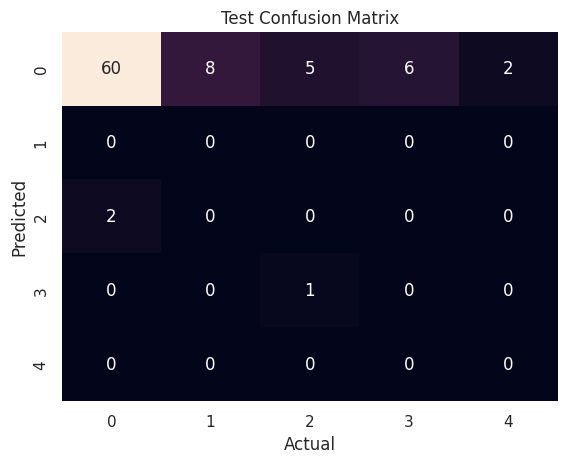

Classification report
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.71      0.62        84



In [337]:
dt_tomek_result=function_model("Decision Tree tomek (Undersampling)",dt, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

Random Forest (Undersampling)

Model:  Random Forest tomek (Undersampling)
Train Accuracy score:  0.7211538461538461
Test Accuracy score:  0.7380952380952381


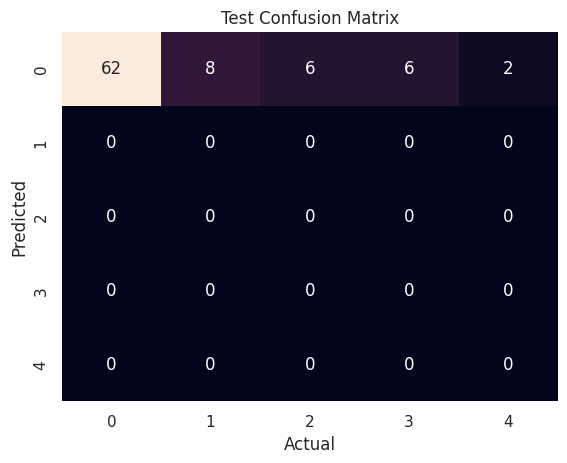

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [338]:
rf_tomek_result=function_model("Random Forest tomek (Undersampling)",rf, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

Adaboost Tomek Undersampling

Model:  Ada Boost tomek (Undersampling)
Train Accuracy score:  0.7211538461538461
Test Accuracy score:  0.7380952380952381


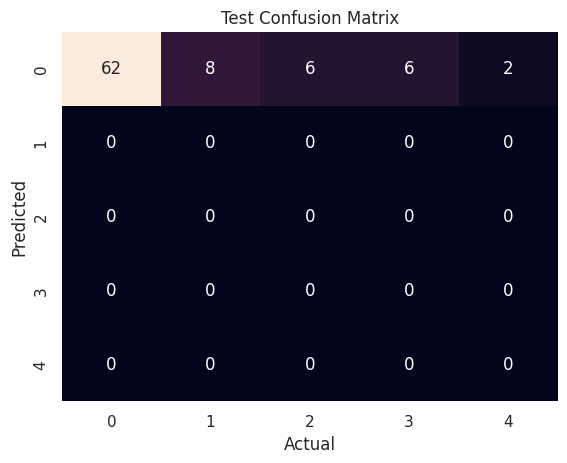

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [339]:
ada_tomek_result=function_model("Ada Boost tomek (Undersampling)",ada_boost, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

Gradient Boosting Tomek (Undersampling)

Model:  Gradient Boosting tomek (Undersampling)
Train Accuracy score:  0.7211538461538461
Test Accuracy score:  0.7380952380952381


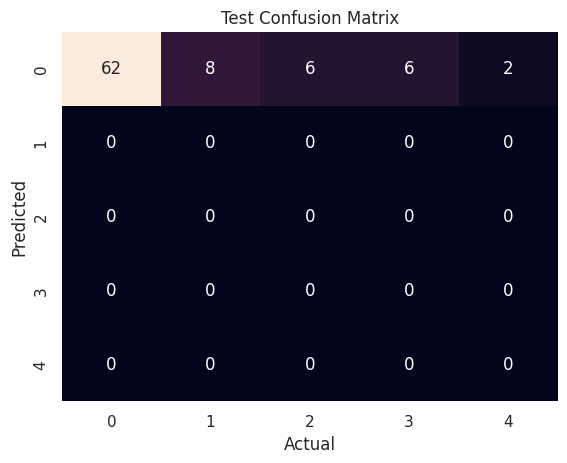

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [340]:
gb_tomek_result=function_model("Gradient Boosting tomek (Undersampling)",grad_boost, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

XGB Tomek (Undersampling)

Model:  XGB tomek (Undersampling)
Train Accuracy score:  0.9967948717948718
Test Accuracy score:  0.7023809523809523


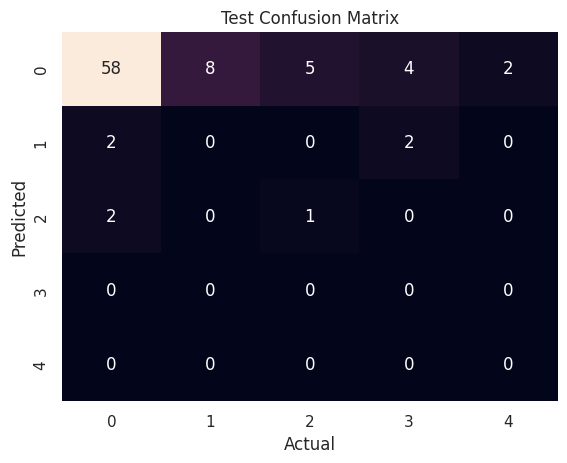

Classification report
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        62
           1       0.00      0.00      0.00         8
           2       0.33      0.17      0.22         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.22      0.22      0.21        84
weighted avg       0.58      0.70      0.63        84



In [341]:
xgb_tomek_result=function_model("XGB tomek (Undersampling)",xgb_clf, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

LGBM Tomek (Undersampling)

Model:  Light GBM tomek (Undersampling)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21094
[LightGBM] [Info] Number of data points in the train set: 312, number of used features: 226
[LightGBM] [Info] Start training from score -0.326903
[LightGBM] [Info] Start training from score -2.277267
[LightGBM] [Info] Start training from score -2.524127
[LightGBM] [Info] Start training from score -2.564949
[LightGBM] [Info] Start training from score -3.951244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

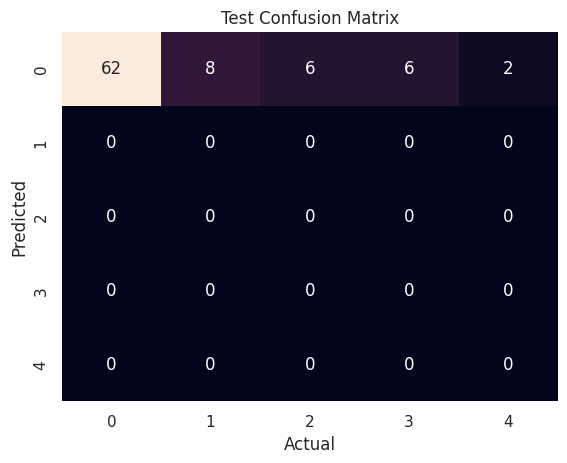

Classification report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



In [342]:
lgbm_tomek_result=function_model("Light GBM tomek (Undersampling)",lgbm, X_train_tomek_std, y_train_tomek, X_test_tomek_std, y_test)

In [343]:
all_model_summary=all_model_summary.append(lr_tomek_result)
all_model_summary=all_model_summary.append(knn_tomek_result)
all_model_summary=all_model_summary.append(svc_tomek_result)
all_model_summary=all_model_summary.append(dt_tomek_result)
all_model_summary=all_model_summary.append(rf_tomek_result)
all_model_summary=all_model_summary.append(ada_tomek_result)
all_model_summary=all_model_summary.append(gb_tomek_result)
all_model_summary=all_model_summary.append(xgb_tomek_result)
all_model_summary=all_model_summary.append(lgbm_tomek_result)


all_model_summary.reset_index(drop=True, inplace=True)
all_model_summary

,Model,Train Accuracy,Test Accuracy,Precision,recall,f1 score
0,Logistic Regression,0.79,0.75,0.66,0.75,0.67
1,K Nearest Neighbour,0.74,0.75,0.62,0.75,0.65
2,SVC,0.74,0.74,0.54,0.74,0.63
3,Decision Tree,0.75,0.73,0.55,0.73,0.63
4,Random Forest,0.74,0.74,0.54,0.74,0.63
5,Ada Boost,0.74,0.74,0.54,0.74,0.63
6,Gradient Boosting,0.74,0.74,0.54,0.74,0.63
7,XGB,1.00,0.75,0.67,0.75,0.67
8,Light GBM,0.74,0.74,0.54,0.74,0.63
9,Logistic Regression SMOTE,0.96,0.67,0.65,0.67,0.65


In [345]:
all_model_summary.to_pickle('dataframe.pickle')
all_model_summary.to_pickle('dataframe_original_smote_tomek.pickle')

Since after applying Tomek, only few samples of accident level I has been removed, the model accuracy and other parameters are similar to that of model performance on original data.

However, model performance on original data is better than after performing undersampling or oversampling on data

In [359]:
!jupyter nbconvert --to html capstone_step5_Tarang_Shah.ipynb


[NbConvertApp] Converting notebook capstone_step5_Tarang_Shah.ipynb to html
[NbConvertApp] Writing 3205543 bytes to capstone_step5_Tarang_Shah.html
